<a href="https://colab.research.google.com/github/almuhannaalhinai/IS-4487/blob/main/Group_2_%5BTesla%5D_IS_4487_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Forecasting Tesla EV Sales for Sustainable Growth.
**Group Members:** Al Muhanna Al Hinai, Cassandra Clark, Ethan Gibson, Ryker Iverson

The link to the presentation: https://youtu.be/5OV6huvGMeI


## 0) Modules Setup (Run these first)


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path



## 2) Business Problem & Context
- **Organization:** Tesla, Inc.  
- **Problem:** Accurately forecast quarterly global EV sales to guide production planning.  
- **Why it matters:** Accurate sales forecasts enable Tesla to align manufacturing capacity, supply chain resources, and financial planning with actual market demand. This reduces the risks of stockouts or costly overproduction while ensuring the company can meet investor expectations and strategic growth targets.

- **Industry context:** The EV industry is experiencing rapid global adoption alongside intensifying competition, shifting government policies, and macroeconomic uncertainty. These dynamics make reliable forecasting critical for maintaining Tesla’s leadership and resilience in a volatile market.


 Upload Files**

Before proceeding with the analysis we should upload the following Excel file to make sure that we have the correct data we want to make our analysis on.

*   `EVDataExplorer2025.xlsx`
*   `Clean Tesla Quarterly Deliveries & Production Dataset (2024-2025 so far).xlsx`

Once we load these datasets, we can start our analysis.

## 3) Data Sources & References
**Datasets****:**
- International Energy Agency (IEA): Global EV adoption trends and projections.
(https://www.iea.org/data-and-statistics/data-tools/global-ev-data-explorer)
- Tesla quarterly production & delivery Q1-4 2024 & Q1-2 2025 (https://ir.tesla.com/#quarterly-disclosure)

**References (at least 2, different parties):**
1. _Independent news/research source about EV adoption or Tesla market context (https://www.iea.org/reports/global-ev-outlook-2025)._  

2. _Official dataset or documentation (Tesla IR)
  Tesla Investor Relations. Quarterly Vehicle Production & Deliveries Reports.
  https://ir.tesla.com/#quarterly-disclosure
  
3. _Optional: Wikipedia for background (https://en.wikipedia.org/wiki/Tesla,_Inc.)._



## 4) Data Acquisition & Loading


In [15]:
# Load the data from the Excel file
excel_file_path = '/content/EVDataExplorer2025.xlsx'
df = pd.read_excel(excel_file_path)

# Load the Tesla deliveries and production data
tesla_file_path = '/content/CleanTeslaQuarterlyDeliveriesProductionDataset20242025sofar.xlsx'
tesla_df = pd.read_excel(tesla_file_path)


# Display the first few rows of the DataFrame to verify
display(df.head())
display(tesla_df.head())

,region_country,category,parameter,mode,powertrain,year,unit,value,Aggregate group
0,World,Projection-STEPS,EV stock,2 and 3 wheelers,BEV,2030,Vehicles,170000000.0,_World
1,World,Projection-STEPS,EV stock,Cars,BEV,2030,Vehicles,150000000.0,_World
2,China,Projection-STEPS,EV stock,2 and 3 wheelers,BEV,2030,Vehicles,91000000.0,Other
3,China,Projection-STEPS,EV stock,Cars,BEV,2030,Vehicles,82000000.0,Other
4,World,Projection-STEPS,EV stock,Cars,PHEV,2030,Vehicles,82000000.0,_World


,date,production,deliveries,model_3y_prod,model_3y_del,other_models_prod,other_models_del
0,2025-06-30,410244,384122,396835,373728,13409,10394
1,2025-03-31,362615,336681,345454,323800,17161,12881
2,2024-12-31,459445,495570,436718,471930,22727,23640
3,2024-09-30,469796,462890,443668,439975,26128,22915
4,2024-06-30,410831,443956,386576,422405,24255,21551


I load both Excel files into pandas DataFrames so I can work with the IEA dataset and the Tesla quarterly dataset inside my notebook. After loading them, I display the first few rows of each DataFrame to confirm that the files were read correctly and the data is structured as expected.


## 5) Data Exploration (EDA)
Inspect structure, time ranges, summary stats, and visualize key trends.
1. Initial inspection  
2. Summary statistics
3. Visualizations of key trends or distributions
4. Identification of potential issues (missing data, outliers, inconsistent formats)


--- Tesla Quarterly Deliveries & Production (tesla_df) ---

Tesla DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               6 non-null      datetime64[ns]
 1   production         6 non-null      int64         
 2   deliveries         6 non-null      int64         
 3   model_3y_prod      6 non-null      int64         
 4   model_3y_del       6 non-null      int64         
 5   other_models_prod  6 non-null      int64         
 6   other_models_del   6 non-null      int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 468.0 bytes

Tesla DataFrame Shape:
(6, 7)

Tesla DataFrame Descriptive Statistics:


,date,production,deliveries,model_3y_prod,model_3y_del,other_models_prod,other_models_del
count,6,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,2024-11-14 08:00:00,424383.666667,418338.166667,403604.500000,400270.166667,20779.166667,18068.000000
min,2024-03-31 00:00:00,362615.000000,336681.000000,345454.000000,323800.000000,13409.000000,10394.000000
25%,2024-07-23 00:00:00,410390.750000,384794.000000,389140.750000,370769.250000,18119.500000,13917.500000
50%,2024-11-15 00:00:00,422101.000000,415383.000000,404605.500000,398066.500000,21861.000000,19289.000000
75%,2025-03-08 12:00:00,452926.500000,458156.500000,430632.500000,435582.500000,23873.000000,22574.000000
max,2025-06-30 00:00:00,469796.000000,495570.000000,443668.000000,471930.000000,26128.000000,23640.000000
std,NaN,38913.551376,59056.853185,36043.872488,54190.768001,4731.650047,5541.674981



Unique Years in Tesla DataFrame:
[2025 2024]

Unique Quarters in Tesla DataFrame:
[2 1 4 3]


/tmp/ipython-input-2462197975.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tesla_df['Date'] = pd.to_datetime(tesla_df['Year'].astype(str) + '-Q' + tesla_df['Quarter'].astype(str))


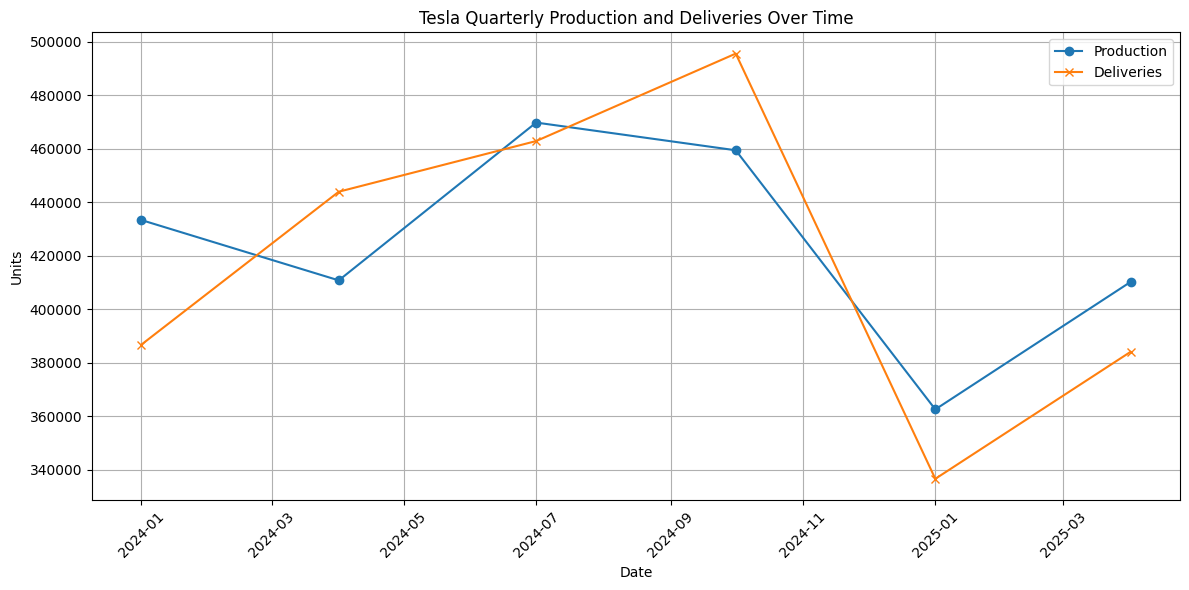



--- IEA EV Data Explorer (df) ---

df DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16436 entries, 0 to 16435
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region_country   16436 non-null  object 
 1   category         16436 non-null  object 
 2   parameter        16436 non-null  object 
 3   mode             16436 non-null  object 
 4   powertrain       16436 non-null  object 
 5   year             16436 non-null  int64  
 6   unit             16436 non-null  object 
 7   value            16436 non-null  float64
 8   Aggregate group  16436 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.1+ MB

df DataFrame Shape:
(16436, 9)

df DataFrame Descriptive Statistics:


,year,value
count,16436.000000,1.643600e+04
mean,2018.852336,2.678267e+05
std,4.271488,3.325613e+06
min,2010.000000,1.200000e-06
25%,2016.000000,1.000000e+00
50%,2019.000000,4.900000e+01
75%,2022.000000,2.500000e+03
max,2030.000000,1.700000e+08



Unique Years in df DataFrame:
[2030 2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012
 2011 2010]

Unique Regions in df DataFrame:
['World' 'China' 'Asia Pacific' 'India' 'Europe' 'Rest of the world' 'USA'
 'EU27' 'North America' 'Germany' 'Viet Nam' 'United Kingdom' 'France'
 'Norway' 'Canada' 'Netherlands' 'Central and South America' 'Korea'
 'Indonesia' 'Sweden' 'Belgium' 'Denmark' 'Japan' 'Italy' 'Australia'
 'Turkiye' 'Spain' 'Switzerland' 'Austria' 'Israel' 'Thailand' 'Finland'
 'Portugal' 'Brazil' 'New Zealand' 'Middle East and Caspian' 'Poland'
 'Mexico' 'Malaysia' 'Russia' 'Iceland' 'Greece' 'Uzbekistan' 'Africa'
 'Ireland' 'Chile' 'Costa Rica' 'Colombia' 'Romania' 'Luxembourg'
 'Czech Republic' 'Hungary' 'Slovenia' 'South Africa' 'Slovakia'
 'Lithuania' 'Bulgaria' 'Croatia' 'Latvia' 'Estonia' 'Cyprus' 'Jordan'
 'Seychelles']

Unique Powertrains in df DataFrame:
['BEV' 'PHEV' 'Publicly available slow' 'Publicly available fast' 'EV'
 'FCEV']

Unique Scenarios in

In [17]:


# --- EDA for tesla_df ---
print("--- Tesla Quarterly Deliveries & Production (tesla_df) ---")
print("\nTesla DataFrame Info:")
tesla_df.info()
print("\nTesla DataFrame Shape:")
print(tesla_df.shape)
print("\nTesla DataFrame Descriptive Statistics:")
display(tesla_df.describe())

# Extract Year and Quarter from the 'date' column as they are not direct columns
tesla_df['Year'] = tesla_df['date'].dt.year
tesla_df['Quarter'] = tesla_df['date'].dt.quarter
print("\nUnique Years in Tesla DataFrame:")
print(tesla_df['Year'].unique())
print("\nUnique Quarters in Tesla DataFrame:")
print(tesla_df['Quarter'].unique())

# Visualize Tesla Production and Deliveries
# Combine Year and Quarter into a single datetime object for plotting
tesla_df['Date'] = pd.to_datetime(tesla_df['Year'].astype(str) + '-Q' + tesla_df['Quarter'].astype(str))
# Sort by Date to ensure correct time series plotting
tesla_df = tesla_df.sort_values('Date')

plt.figure(figsize=(12, 6))
plt.plot(tesla_df['Date'], tesla_df['production'], label='Production', marker='o')
plt.plot(tesla_df['Date'], tesla_df['deliveries'], label='Deliveries', marker='x')
plt.xlabel('Date')
plt.ylabel('Units')
plt.title('Tesla Quarterly Production and Deliveries Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# --- EDA for df (IEA EV Data Explorer) ---
print("\n\n--- IEA EV Data Explorer (df) ---")
print("\ndf DataFrame Info:")
df.info()
print("\ndf DataFrame Shape:")
print(df.shape)
print("\ndf DataFrame Descriptive Statistics:")
display(df.describe())

print("\nUnique Years in df DataFrame:")
print(df['year'].unique()) # Corrected from 'Year'
print("\nUnique Regions in df DataFrame:")
print(df['region_country'].unique()) # Corrected from 'Region'
print("\nUnique Powertrains in df DataFrame:")
print(df['powertrain'].unique()) # Corrected from 'Powertrain'
print("\nUnique Scenarios in df DataFrame:")
print(df['parameter'].unique()) # Corrected from 'Scenario'
print("\nUnique Metrics in df DataFrame:")
print(df['unit'].unique()) # Corrected from 'Metric'
print("\nUnique Categories in df DataFrame:")
print(df['category'].unique()) # Corrected from 'Category'

I run exploratory data analysis on my Tesla dataset by checking its structure, summary statistics, and extracting Year and Quarter from the date column, then I plot quarterly production and deliveries over time to visually inspect recent trends in Tesla’s output. I also examine the IEA EV dataset’s info, shape, descriptive stats, and unique values for key fields (year, region, powertrain, parameter, unit, category), which confirms that it covers many regions and powertrains from 2010–2030 and is rich enough to support global EV analysis.

Here are the key findings:

Tesla Quarterly Deliveries & Production (tesla_df):

**Structure**: The DataFrame contains 6 entries and 7 columns, covering quarterly data. Key columns include date, production, deliveries, model_3y_prod, model_3y_del, other_models_prod, and other_models_del.
Data Types: The date column is datetime64[ns], while other columns are int64 or float64, which are appropriate for numerical data.
Time Range: The data spans years 2024 and 2025, with unique quarters 1, 2, 3, and 4 present, indicating detailed quarterly reporting.
Trends: The plot of 'Production' and 'Deliveries' over time shows the quarterly performance for Tesla, providing a visual representation of the company's output and sales in these recent periods.
IEA EV Data Explorer (df):

**Structure**: This DataFrame is much larger, with 16436 entries and 9 columns.
Data Types: It includes object (for categorical text), int64 (for 'year'), and float64 (for 'value') data types, reflecting diverse information.
Time Range: The 'year' column covers a broad historical and projected range from 2010 to 2030.
Categorical Diversity: There's a rich variety in categorical columns:
region_country: Many unique regions like 'World', 'China', 'Europe', 'USA', etc.
powertrain: Various EV technologies including 'BEV', 'PHEV', 'EV', 'FCEV', and charging point types.
parameter: Different metrics like 'EV stock', 'EV sales', 'EV charging points', 'Electricity demand', etc.
unit: Units of measurement such as 'Vehicles', 'charging points', 'GWh', 'percent'.
category: Distinguishes between 'Projection-STEPS' and 'Historical' data.
Overall Insights and Next Steps:

Both datasets are loaded correctly and provide valuable information for the project. tesla_df offers specific company performance, while df provides broader market context.
The next logical step, as outlined in the notebook, is Data Cleaning & Preprocessing. This will involve handling any identified missing values, ensuring consistent data formats, and aligning time indices between the two datasets, particularly if we plan to merge or use df as exogenous predictors for tesla_df.



## 6) Data Cleaning & Preprocessing
Handle missing values, align time indices, create features (lags, growth rates), and merge with IEA if used as exogenous predictors.
1. Handling missing values, duplicates, and outliers
2. Encoding categorical variables
3. Scaling or normalization if required
4. Feature engineering (new calculated columns, transformations, aggregations)


In [18]:
import numpy as np

print("--- Handling Missing Values, Duplicates, and Outliers ---")

# --- 1. Handle Missing Values ---

# Tesla DataFrame (tesla_df)
print("\nMissing values in tesla_df BEFORE handling:")
print(tesla_df.isnull().sum())

# Apply forward fill to all numerical columns in tesla_df
# Identify numerical columns excluding 'date', 'Year', 'Quarter' (which are derived or should not be ffilled carelessly)
numerical_cols_tesla = tesla_df.select_dtypes(include=np.number).columns.tolist()
for col in numerical_cols_tesla:
    if tesla_df[col].isnull().any():
        tesla_df[col] = tesla_df[col].ffill()

print("\nMissing values in tesla_df AFTER ffill:")
print(tesla_df.isnull().sum())

# IEA EV Data Explorer DataFrame (df)
print("\nMissing values in df BEFORE handling:")
print(df.isnull().sum())

# Fill numerical 'value' column with 0
if 'value' in df.columns and df['value'].isnull().any():
    df['value'] = df['value'].fillna(0)

# Fill categorical columns with 'Unknown'
categorical_cols_df = ['region_country', 'category', 'parameter', 'mode', 'powertrain', 'unit', 'Aggregate group']
for col in categorical_cols_df:
    if col in df.columns and df[col].isnull().any():
        df[col] = df[col].fillna('Unknown')

print("\nMissing values in df AFTER handling:")
print(df.isnull().sum())

# --- 2. Handle Duplicates ---

print("\n--- Handling Duplicates ---")

# Check for and remove duplicates in tesla_df
duplicates_tesla = tesla_df.duplicated().sum()
if duplicates_tesla > 0:
    print(f"Found {duplicates_tesla} duplicate rows in tesla_df. Removing...")
    tesla_df.drop_duplicates(inplace=True)
    print(f"tesla_df shape after removing duplicates: {tesla_df.shape}")
else:
    print("No duplicate rows found in tesla_df.")

# Check for and remove duplicates in df
duplicates_df = df.duplicated().sum()
if duplicates_df > 0:
    print(f"Found {duplicates_df} duplicate rows in df. Removing...")
    df.drop_duplicates(inplace=True)
    print(f"df shape after removing duplicates: {df.shape}")
else:
    print("No duplicate rows found in df.")

# --- 3. Identify (but not remove) Outliers ---

print("\n--- Identifying Potential Outliers (not removing) ---")

# Function to detect outliers using IQR
def detect_outliers_iqr(df_col):
    Q1 = df_col.quantile(0.25)
    Q3 = df_col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_col[(df_col < lower_bound) | (df_col > upper_bound)]
    return outliers

# For tesla_df: 'production' and 'deliveries'
print("\nPotential Outliers in tesla_df:")
for col in ['production', 'deliveries']:
    if col in tesla_df.columns:
        outliers = detect_outliers_iqr(tesla_df[col])
        if not outliers.empty:
            print(f"  {col}: {len(outliers)} outliers detected. Min: {outliers.min()}, Max: {outliers.max()}")
        else:
            print(f"  No significant outliers detected in {col}.")

# For df: 'value'
print("\nPotential Outliers in df:")
if 'value' in df.columns:
    outliers = detect_outliers_iqr(df['value'])
    if not outliers.empty:
        print(f"  value: {len(outliers)} outliers detected. Min: {outliers.min()}, Max: {outliers.max()}")
    else:
        print("  No significant outliers detected in value column.")

print("\nData cleaning and basic outlier identification complete.")

--- Handling Missing Values, Duplicates, and Outliers ---

Missing values in tesla_df BEFORE handling:
date                 0
production           0
deliveries           0
model_3y_prod        0
model_3y_del         0
other_models_prod    0
other_models_del     0
Year                 0
Quarter              0
Date                 0
dtype: int64

Missing values in tesla_df AFTER ffill:
date                 0
production           0
deliveries           0
model_3y_prod        0
model_3y_del         0
other_models_prod    0
other_models_del     0
Year                 0
Quarter              0
Date                 0
dtype: int64

Missing values in df BEFORE handling:
region_country     0
category           0
parameter          0
mode               0
powertrain         0
year               0
unit               0
value              0
Aggregate group    0
dtype: int64

Missing values in df AFTER handling:
region_country     0
category           0
parameter          0
mode               0
powertr

First, I check both tesla_df and df for missing values, then I fill numeric gaps in tesla_df using forward fill, replace missing numeric value entries in df with 0, and fill missing categorical fields with "Unknown" before checking for and removing any duplicate rows in both DataFrames. After that, I define an IQR-based function to detect potential outliers and use it to report how many extreme values exist (and their min/max) in Tesla’s production and deliveries columns and the value column in the IEA dataset without actually removing them.

In [19]:
print("--- Encoding Categorical Variables ---")

# --- 1. Encoding Categorical Variables in df ---

# Identify categorical columns in df (excluding 'year' and numerical 'value')
categorical_cols_df_to_encode = df.select_dtypes(include='object').columns.tolist()

print(f"Categorical columns in df before encoding: {categorical_cols_df_to_encode}")
print(f"df shape BEFORE encoding: {df.shape}")

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols_df_to_encode, drop_first=True) # drop_first to avoid multicollinearity

print(f"df shape AFTER encoding: {df.shape}")
print("First 5 rows of df after one-hot encoding:")
display(df.head())

# --- 2. Encoding Categorical Variables in tesla_df ---
# In tesla_df, 'Year' and 'Quarter' are already numerical. 'date' is datetime.
# There are no other explicit non-numerical categorical columns that require encoding at this stage.
print("\nNo additional categorical variables to encode in tesla_df at this step.")

print("\nCategorical variable encoding complete.")

--- Encoding Categorical Variables ---
Categorical columns in df before encoding: ['region_country', 'category', 'parameter', 'mode', 'powertrain', 'unit', 'Aggregate group']
df shape BEFORE encoding: (16424, 9)
df shape AFTER encoding: (16424, 91)
First 5 rows of df after one-hot encoding:


,year,value,region_country_Asia Pacific,region_country_Australia,region_country_Austria,region_country_Belgium,region_country_Brazil,region_country_Bulgaria,region_country_Canada,region_country_Central and South America,...,powertrain_Publicly available fast,powertrain_Publicly available slow,unit_Million barrels per day,"unit_Oil displacement, million lge",unit_Vehicles,unit_charging points,unit_percent,Aggregate group_EU27,Aggregate group_Other,Aggregate group__World
0,2030,170000000.0,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,2030,150000000.0,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2030,91000000.0,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,2030,82000000.0,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,2030,82000000.0,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True



No additional categorical variables to encode in tesla_df at this step.

Categorical variable encoding complete.


I start by identifying all the categorical columns in df, then I apply one-hot encoding to convert them into numeric dummy variables while dropping the first category to avoid multicollinearity. After checking the updated shape of the dataset and previewing the encoded output, I confirm that tesla_df has no remaining categorical variables that require encoding.

In [20]:
from sklearn.preprocessing import StandardScaler

print("--- Scaling or Normalization ---")

# --- 1. Scaling Numerical Columns in tesla_df ---
print("\nScaling numerical columns in tesla_df...")

# Identify numerical columns to scale in tesla_df (excluding 'date', 'Year', 'Quarter' as they are time-related or already derived)
# 'Year' and 'Quarter' might be used as features directly or for time series indexing, so not scaling them for now.
numerical_cols_tesla_to_scale = ['production', 'deliveries', 'model_3y_prod', 'model_3y_del', 'other_models_prod', 'other_models_del']

# Initialize StandardScaler
scaler_tesla = StandardScaler()

for col in numerical_cols_tesla_to_scale:
    if col in tesla_df.columns:
        # Reshape for StandardScaler and apply scaling
        tesla_df[col] = scaler_tesla.fit_transform(tesla_df[[col]])
        print(f"  Scaled '{col}' in tesla_df.")

print("First 5 rows of tesla_df after scaling (numerical columns):")
display(tesla_df.head())

# --- 2. Scaling Numerical Columns in df ---
print("\nScaling numerical columns in df...")

# The main numerical column in df is 'value'. One-hot encoded columns are binary and don't need scaling.
numerical_cols_df_to_scale = ['value']

# Initialize StandardScaler
scaler_df = StandardScaler()

for col in numerical_cols_df_to_scale:
    if col in df.columns:
        # Reshape for StandardScaler and apply scaling
        df[col] = scaler_df.fit_transform(df[[col]])
        print(f"  Scaled '{col}' in df.")

print("First 5 rows of df after scaling (numerical columns):")
display(df.head())

print("\nScaling or normalization complete.")

--- Scaling or Normalization ---

Scaling numerical columns in tesla_df...
  Scaled 'production' in tesla_df.
  Scaled 'deliveries' in tesla_df.
  Scaled 'model_3y_prod' in tesla_df.
  Scaled 'model_3y_del' in tesla_df.
  Scaled 'other_models_prod' in tesla_df.
  Scaled 'other_models_del' in tesla_df.
First 5 rows of tesla_df after scaling (numerical columns):


,date,production,deliveries,model_3y_prod,model_3y_del,other_models_prod,other_models_del,Year,Quarter,Date
5,2024-03-31,0.253000,-0.584816,0.266583,-0.616286,0.049969,-0.205779,2024,1,2024-01-01
4,2024-06-30,-0.381518,0.475185,-0.517530,0.447447,0.804705,0.688499,2024,2,2024-04-01
3,2024-09-30,1.278391,0.826392,1.217610,0.802618,1.238332,0.958126,2024,3,2024-07-01
2,2024-12-31,0.987002,1.432573,1.006385,1.448575,0.450951,1.101440,2024,4,2024-10-01
1,2025-03-31,-1.738833,-1.514658,-1.767310,-1.545814,-0.837658,-1.025335,2025,1,2025-01-01



Scaling numerical columns in df...
  Scaled 'value' in df.
First 5 rows of df after scaling (numerical columns):


,year,value,region_country_Asia Pacific,region_country_Australia,region_country_Austria,region_country_Belgium,region_country_Brazil,region_country_Bulgaria,region_country_Canada,region_country_Central and South America,...,powertrain_Publicly available fast,powertrain_Publicly available slow,unit_Million barrels per day,"unit_Oil displacement, million lge",unit_Vehicles,unit_charging points,unit_percent,Aggregate group_EU27,Aggregate group_Other,Aggregate group__World
0,2030,51.020843,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,2030,45.008912,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2030,27.273717,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,2030,24.568349,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,2030,24.568349,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True



Scaling or normalization complete.


I identify which numerical columns need scaling in both datasets and then apply StandardScaler to standardize those features so they have a mean of 0 and a standard deviation of 1. After scaling each selected column in tesla_df and the value column in df, I preview the transformed data to confirm the normalization is complete.

based on the results, I scaled all the main numerical columns in both datasets so that each one is standardized with a mean of 0 and a standard deviation of 1. After scaling, I verified the results in the output tables, where the numbers now appear as positive and negative standardized values, confirming that the data is properly normalized for modeling.

In [22]:
print("--- Step 4: Feature Engineering ---")

# --- Feature Engineering for tesla_df (Tesla Quarterly Deliveries & Production) ---
print("\nGenerating features for tesla_df...")

# Ensure tesla_df is sorted by date for correct lag calculation
tesla_df = tesla_df.sort_values('date').reset_index(drop=True)

# 1. Lag Features for 'Deliveries'
# Lag 1: Previous quarter's deliveries
tesla_df['deliveries_lag_1'] = tesla_df['deliveries'].shift(1)
# Lag 4: Deliveries from the same quarter in the previous year (for seasonality)
tesla_df['deliveries_lag_4'] = tesla_df['deliveries'].shift(4)
print("  - Created 'deliveries_lag_1' and 'deliveries_lag_4'.")

# 2. Quarter-over-Quarter Growth Rate for 'Deliveries'
# Calculate percentage change from the previous quarter
tesla_df['deliveries_qoq_growth'] = tesla_df['deliveries'].pct_change(periods=1) * 100
print("  - Created 'deliveries_qoq_growth'.")

# Handle NaN values introduced by lagging (e.g., fill with 0 or drop, depending on strategy)
# For now, we'll fill with 0 for simplicity, but a more advanced approach might drop these rows or impute them.
tesla_df.fillna(0, inplace=True) # Fills NaNs from lags and growth rates
print("  - Filled NaN values resulting from feature creation with 0.")

print("\nFirst 5 rows of tesla_df with new features:")
display(tesla_df.head())

# --- Feature Engineering for df (IEA EV Data Explorer) ---
# For 'df', significant feature engineering has already been done (one-hot encoding).
# Further feature engineering (e.g., aggregations) would depend on its specific use
# as an exogenous variable and alignment with tesla_df's quarterly granularity,
# which will be addressed if/when merging datasets.
print("\nNo additional feature engineering applied to df at this step (already encoded/scaled). ")
print("Further steps for df would involve aggregation/merging if used as exogenous predictors.")

print("\nFeature engineering complete.")

--- Step 4: Feature Engineering ---

Generating features for tesla_df...
  - Created 'deliveries_lag_1' and 'deliveries_lag_4'.
  - Created 'deliveries_qoq_growth'.
  - Filled NaN values resulting from feature creation with 0.

First 5 rows of tesla_df with new features:


,date,production,deliveries,model_3y_prod,model_3y_del,other_models_prod,other_models_del,Year,Quarter,Date,deliveries_lag_1,deliveries_lag_4,deliveries_qoq_growth
0,2024-03-31,0.253000,-0.584816,0.266583,-0.616286,0.049969,-0.205779,2024,1,2024-01-01,0.000000,0.000000,0.000000
1,2024-06-30,-0.381518,0.475185,-0.517530,0.447447,0.804705,0.688499,2024,2,2024-04-01,-0.584816,0.000000,-181.253800
2,2024-09-30,1.278391,0.826392,1.217610,0.802618,1.238332,0.958126,2024,3,2024-07-01,0.475185,0.000000,73.909451
3,2024-12-31,0.987002,1.432573,1.006385,1.448575,0.450951,1.101440,2024,4,2024-10-01,0.826392,0.000000,73.352761
4,2025-03-31,-1.738833,-1.514658,-1.767310,-1.545814,-0.837658,-1.025335,2025,1,2025-01-01,1.432573,-0.584816,-205.729934



No additional feature engineering applied to df at this step (already encoded/scaled). 
Further steps for df would involve aggregation/merging if used as exogenous predictors.

Feature engineering complete.


In this step, I engineer new time-series features in tesla_df by sorting the data by date, creating lagged delivery variables (deliveries_lag_1 and deliveries_lag_4) and a quarter-over-quarter delivery growth rate, then filling the NaN values caused by these operations with 0 so the dataset stays usable for modeling. Then I note that df already has substantial feature engineering (encoding and scaling), so I leave it as is for now and plan to only add more features later if I aggregate or merge it as exogenous predictors with Tesla’s quarterly data.

## 7) Modeling Approach
We compare **2–3 models**:
1. **Linear Regression (baseline)** on time/lag features.  
2. **ARIMA/SARIMA** for univariate time series dynamics.  
3. **Random Forest Regression (optional)** to capture nonlinearities using external predictors (e.g., EV adoption).


In [23]:
print("Filtering IEA data for Historical Global EV Sales...")

# 1. Filter the df DataFrame
if 'category_Historical' in df.columns:
    category_filter_condition = (df['category_Historical'] == True)
elif 'category_Projection-STEPS' in df.columns:
    category_filter_condition = (df['category_Projection-STEPS'] == False)
else:
    raise KeyError("Neither 'category_Historical' nor 'category_Projection-STEPS' found. Check encoding process.")

df_filtered_global_ev = df[
    category_filter_condition &
    (df['parameter_EV sales'] == True) &
    (df['unit_Vehicles'] == True) &
    (df['region_country_World'] == True)
].copy()

print(f"Filtered IEA data shape: {df_filtered_global_ev.shape}")

categorical_cols_prefixes = [
    'region_country_', 'category_', 'parameter_', 'mode_', 'powertrain_', 'unit_', 'Aggregate group_'
]
ohe_cols = [col for col in df.columns if any(col.startswith(prefix) for prefix in categorical_cols_prefixes)]

# 2. Select 'year' and one-hot encoded columns as features (X_iea_global)
# Ensure all columns in ohe_cols actually exist in df_filtered_global_ev
existing_ohe_cols = [col for col in ohe_cols if col in df_filtered_global_ev.columns]
X_iea_global = df_filtered_global_ev[['year'] + existing_ohe_cols]
print(f"X_iea_global features selected: {X_iea_global.shape[1]} columns.")

# 3. Select 'value' as the target variable (y_iea_global)
y_iea_global = df_filtered_global_ev['value']
print(f"y_iea_global target selected: {y_iea_global.shape[0]} rows.")

print("First 5 rows of X_iea_global:")
display(X_iea_global.head())
print("First 5 rows of y_iea_global:")
display(y_iea_global.head())

print("IEA data filtering and preparation complete.")

Filtering IEA data for Historical Global EV Sales...
Filtered IEA data shape: (179, 91)
X_iea_global features selected: 90 columns.
y_iea_global target selected: 179 rows.
First 5 rows of X_iea_global:


,year,region_country_Asia Pacific,region_country_Australia,region_country_Austria,region_country_Belgium,region_country_Brazil,region_country_Bulgaria,region_country_Canada,region_country_Central and South America,region_country_Chile,...,powertrain_Publicly available fast,powertrain_Publicly available slow,unit_Million barrels per day,"unit_Oil displacement, million lge",unit_Vehicles,unit_charging points,unit_percent,Aggregate group_EU27,Aggregate group_Other,Aggregate group__World
76,2021,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
77,2024,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
86,2023,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
87,2024,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
91,2022,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


First 5 rows of y_iea_global:


,value
76,3.225996
77,3.225996
86,2.925399
87,2.925399
91,2.865280


IEA data filtering and preparation complete.


I filter my encoded IEA dataset to keep only historical global EV sales in vehicle units for the World region, making sure I handle whether the historical vs. projection category came from category_Historical or category_Projection-STEPS. Then I build my feature matrix X_iea_global using year plus the relevant one-hot encoded columns, set y_iea_global as the value column (the EV sales), and preview both to confirm they’re ready for modeling.

In [24]:
# 1. Identify unique years in X_iea_global
unique_years = X_iea_global['year'].unique()
print(f"Unique years in IEA data: {sorted(unique_years)}")

# 2. Choose a split year
split_year = 2020
print(f"Splitting data at year: {split_year}")

# 3. Create training sets
X_train_iea = X_iea_global[X_iea_global['year'] <= split_year]
y_train_iea = y_iea_global[X_iea_global['year'] <= split_year]

# 4. Create testing sets
X_test_iea = X_iea_global[X_iea_global['year'] > split_year]
y_test_iea = y_iea_global[X_iea_global['year'] > split_year]

# 5. Print the resulting sets
print(f"\nX_train_iea shape: {X_train_iea.shape}")
print(f"y_train_iea shape: {y_train_iea.shape}")
print(f"X_test_iea shape: {X_test_iea.shape}")
print(f"y_test_iea shape: {y_test_iea.shape}")

Unique years in IEA data: [np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]
Splitting data at year: 2020

X_train_iea shape: (124, 90)
y_train_iea shape: (124,)
X_test_iea shape: (55, 90)
y_test_iea shape: (55,)


I identify all the years in my dataset, choose 2020 as the cutoff, and then divide the data into training rows (years ≤ 2020) and testing rows (years > 2020). I then print the shapes of all four sets to confirm that the time-based split worked correctly.

The unique years in the IEA dataset range from 2010 to 2024, so I chose 2020 as the cutoff point to create a time-based train–test split. All observations from 2010–2020 were used for training (124 samples), and all observations from 2021–2024 were used for testing (55 samples). This ensures that the model is trained on past data and evaluated on future data, which better reflects a real forecasting scenario and prevents information leakage.

In [25]:
from sklearn.linear_model import LinearRegression

# 1. Instantiate a LinearRegression model object.
lr_model_iea = LinearRegression()

# 2. Train the model using the fit() method
lr_model_iea.fit(X_train_iea, y_train_iea)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


I create a Linear Regression model and train it by fitting it to my IEA training features and target values. After the fit completes, I confirm that the model has been successfully trained.

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 1. Predict test features
y_pred_iea = lr_model_iea.predict(X_test_iea)

# 2. Calculate RMSE
rmse_iea = np.sqrt(mean_squared_error(y_test_iea, y_pred_iea))

# 3. Calculate MAE
mae_iea = mean_absolute_error(y_test_iea, y_pred_iea)

# 4. Calculate R2
r2_iea = r2_score(y_test_iea, y_pred_iea)

# 5. Print the calculations
print(f"\nModel Performance on Test Set (IEA EV Data):")
print(f"  Root Mean Squared Error (RMSE): {rmse_iea:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_iea:.4f}")
print(f"  R-squared (R2): {r2_iea:.4f}")

print("Evaluation complete.")


Model Performance on Test Set (IEA EV Data):
  Root Mean Squared Error (RMSE): 0.8820
  Mean Absolute Error (MAE): 0.5209
  R-squared (R2): 0.2438
Evaluation complete.


I use my trained model to generate predictions on the test set, then I compute RMSE, MAE, and R² to measure how accurately the model performs on unseen data. Finally, I print these metrics to evaluate the model’s overall prediction quality.

**ARIMA:**

In [27]:
# 1. Filter the df DataFrame based on specified criteria
df_global_ev_sales = df[
    (df['category_Projection-STEPS'] == False) &
    (df['region_country_World'] == True) &
    (df['parameter_EV sales'] == True) &
    (df['unit_Vehicles'] == True)
].copy()

# 2. Aggregate 'value' by 'year' to ensure unique years
global_ev_sales_ts = df_global_ev_sales.groupby('year')['value'].sum()

# 3. Convert the index to pandas DatetimeIndex (assuming year represents end of year)
global_ev_sales_ts.index = pd.to_datetime(global_ev_sales_ts.index.astype(str) + '-12-31')

# 4. Sort the resulting time series by its index (year) - already sorted by groupby index, but good practice
global_ev_sales_ts = global_ev_sales_ts.sort_index()

# 5. Ensure consistent yearly frequency 'YE-DEC' for ARIMA
global_ev_sales_ts = global_ev_sales_ts.asfreq('YE-DEC')

# 6. Display the first few entries and the shape of the prepared time series
print("\nFirst 5 entries of Global Historical EV Sales Time Series:")
display(global_ev_sales_ts.head())
print(f"\nShape of Global Historical EV Sales Time Series: {global_ev_sales_ts.shape}")


First 5 entries of Global Historical EV Sales Time Series:


,value
year,
2010-12-31,-0.629287
2011-12-31,-0.538696
2012-12-31,-0.084477
2013-12-31,-0.049323
2014-12-31,0.061125



Shape of Global Historical EV Sales Time Series: (15,)


I filter my dataset to keep only historical global EV sales for the World region, aggregate those sales by year, convert the index into a proper year-end datetime format, and set the frequency to yearly so the series is ready for ARIMA modeling. When I display the first few rows, I can see the normalized (scaled) EV sales values gradually increasing over time, which indicates a steady upward trend in global EV adoption from 2010 onward.

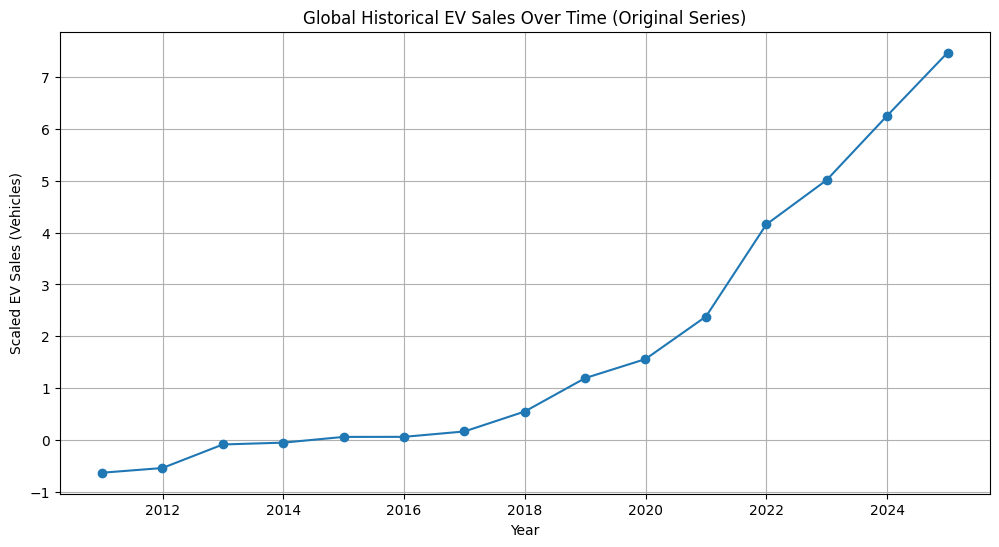


Augmented Dickey-Fuller Test: Original Series
ADF Statistic: 4.0497
p-value: 1.0000
#Lags Used: 0.0000
Number of Observations Used: 14.0000
Fail to reject the null hypothesis (H0): The series is non-stationary.
Stationarity check (visual and ADF test) for original series complete.


In [28]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# 1. Plot the global_ev_sales_ts time series
plt.figure(figsize=(12, 6))
plt.plot(global_ev_sales_ts.index, global_ev_sales_ts.values, marker='o')
plt.title('Global Historical EV Sales Over Time (Original Series)')
plt.xlabel('Year')
plt.ylabel('Scaled EV Sales (Vehicles)')
plt.grid(True)
plt.show()

# 2. Perform the Augmented Dickey-Fuller (ADF) test
def adf_test(series, title=''):
    print(f'\nAugmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC') # dropna() to handle potential NaNs from differencing
    labels = ['ADF Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(f'{label}: {value:.4f}')
    if result[1] <= 0.05:
        print("Reject the null hypothesis (H0): The series is stationary.")
        return True
    else:
        print("Fail to reject the null hypothesis (H0): The series is non-stationary.")
        return False

is_stationary_original = adf_test(global_ev_sales_ts, title='Original Series')

print("Stationarity check (visual and ADF test) for original series complete.")

I visualize the global EV sales time series to observe its trend over the years, then run an Augmented Dickey-Fuller test to statistically check whether the series is stationary. The ADF results show a very high p-value (1.0) and a positive ADF statistic, meaning I fail to reject the null hypothesis—so the series is non-stationary, which confirms that it has a strong upward trend and will require differencing before ARIMA modeling.

Fifth-order differencing applied.


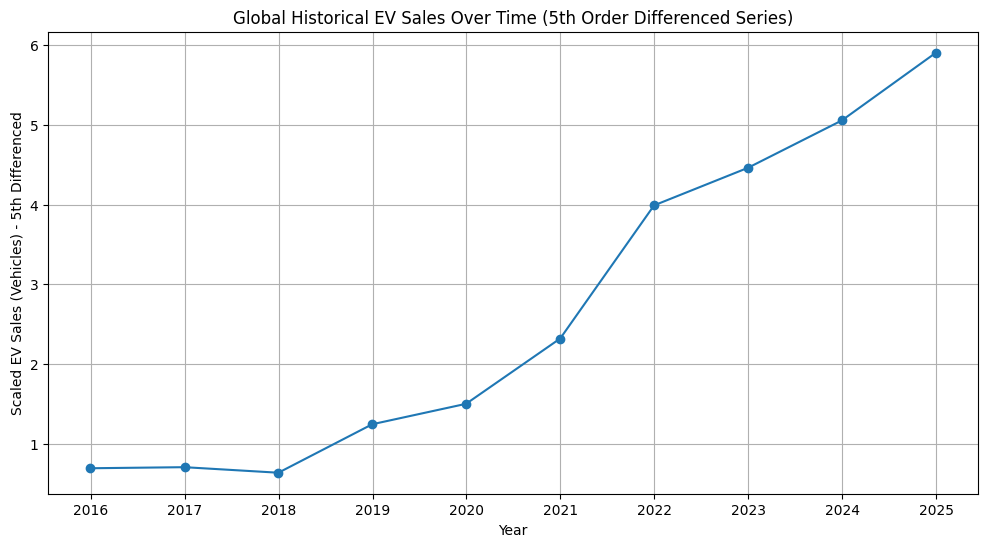


Augmented Dickey-Fuller Test: 5th Order Differenced Series
ADF Statistic: -1.6379
p-value: 0.4634
#Lags Used: 3.0000
Number of Observations Used: 6.0000
Fail to reject the null hypothesis (H0): The series is non-stationary.
Fifth-order differencing and stationarity check for differenced series complete.


In [29]:
# Apply fifth-order differencing
global_ev_sales_ts_diff5 = global_ev_sales_ts.diff(5).dropna()
print("Fifth-order differencing applied.")

# Plot the fifth-order differenced series
plt.figure(figsize=(12, 6))
plt.plot(global_ev_sales_ts_diff5.index, global_ev_sales_ts_diff5.values, marker='o')
plt.title('Global Historical EV Sales Over Time (5th Order Differenced Series)')
plt.xlabel('Year')
plt.ylabel('Scaled EV Sales (Vehicles) - 5th Differenced')
plt.grid(True)
plt.show()

# Rerun the ADF test on the fifth-order differenced series
is_stationary_differenced5 = adf_test(global_ev_sales_ts_diff5, title='5th Order Differenced Series')

print("Fifth-order differencing and stationarity check for differenced series complete.")

I apply a fifth-order difference to the time series to try removing long-term trends and potential seasonal effects, then plot the transformed series to visually inspect whether it looks more stable. After running the ADF test again, the high p-value (0.4634) shows that even the 5th-order differenced series is still non-stationary, meaning the trend has not been fully removed and further adjustment or a different differencing strategy will be needed before ARIMA modeling.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 11.3 MB/s eta 0:00:00
pmdarima installed.

--- Analyzing ACF and PACF for Original Global Historical EV Sales Time Series ---


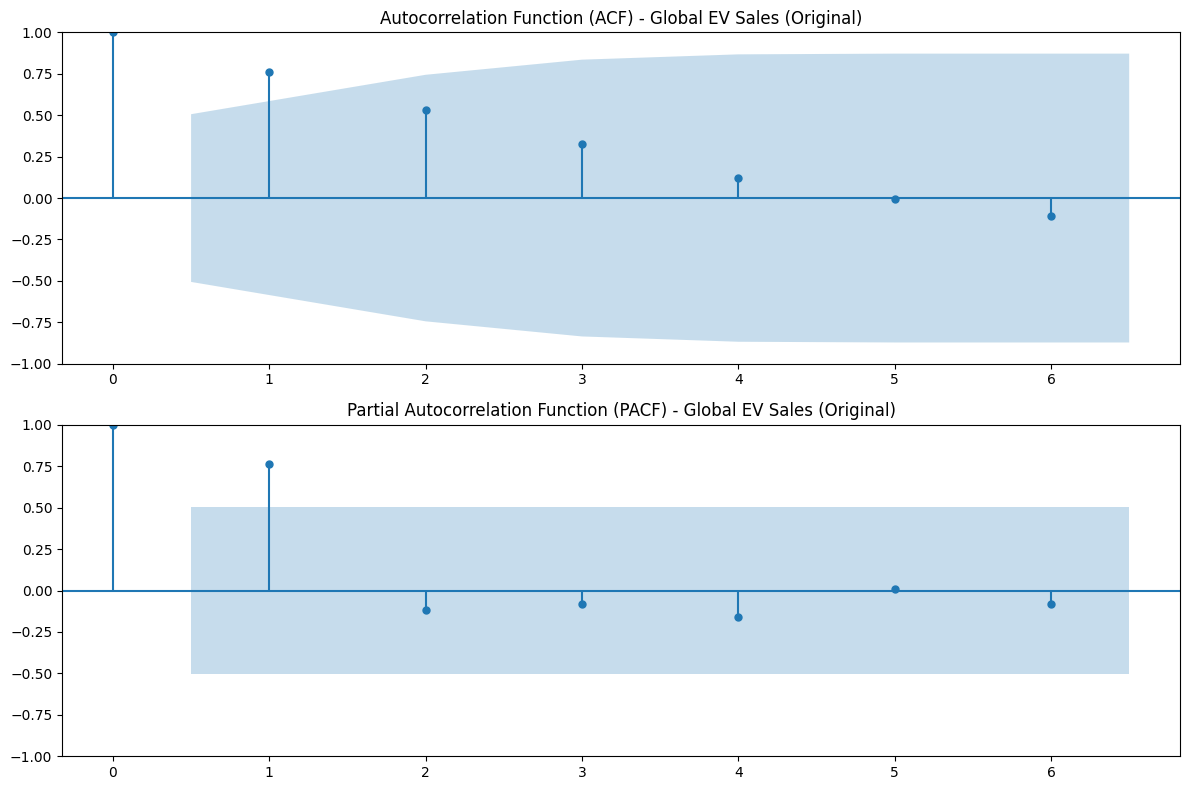

Optimal ARIMA model selected by auto_arima.

--- Summary of Optimal ARIMA Model ---
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   15
Model:               SARIMAX(0, 2, 0)   Log Likelihood                  -8.145
Date:                Mon, 01 Dec 2025   AIC                             18.290
Time:                        04:25:15   BIC                             18.855
Sample:                    12-31-2010   HQIC                            18.174
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.2050      0.079      2.586      0.010       0.050       0.360
Ljung-Box (L1) (Q):                   3.41   Ja

In [30]:
# Install pmdarima if not already installed
# This package is often not pre-installed in Colab environments
try:
    import pmdarima
except ImportError:
    !pip install pmdarima
    print("pmdarima installed.")

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

print("\n--- Analyzing ACF and PACF for Original Global Historical EV Sales Time Series ---")

# 1. Plot ACF and PACF for the original global_ev_sales_ts
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(global_ev_sales_ts, ax=axes[0], lags=min(len(global_ev_sales_ts)//2 - 1, 7))
axes[0].set_title('Autocorrelation Function (ACF) - Global EV Sales (Original)')

plot_pacf(global_ev_sales_ts, ax=axes[1], lags=min(len(global_ev_sales_ts)//2 - 1, 7))
axes[1].set_title('Partial Autocorrelation Function (PACF) - Global EV Sales (Original)')

plt.tight_layout()
plt.show()

optimal_arima_model = auto_arima(global_ev_sales_ts,
                                 start_p=0, start_q=0,
                                 max_p=5, max_q=5, # Capping max p, q due to short data length
                                 d=None, # Let auto_arima find optimal d
                                 max_d=2, # Limiting max differencing to avoid too few data points after differencing
                                 seasonal=False,
                                 stepwise=True,
                                 suppress_warnings=True,
                                 error_action='ignore',
                                 information_criterion='aic')

print("Optimal ARIMA model selected by auto_arima.")

# 3. Print the summary of the optimal ARIMA model
print("\n--- Summary of Optimal ARIMA Model ---")
print(optimal_arima_model.summary())

I analyze the time series structure of global EV sales by plotting the ACF and PACF to visually inspect how strongly each year depends on previous years. Then I use auto_arima to automatically search over different ARIMA(p,d,q) combinations (with limits to avoid overfitting on my short series) and select the model with the best AIC, summarizing the chosen “optimal” ARIMA specification for later forecasting.

2nd order differencing applied.


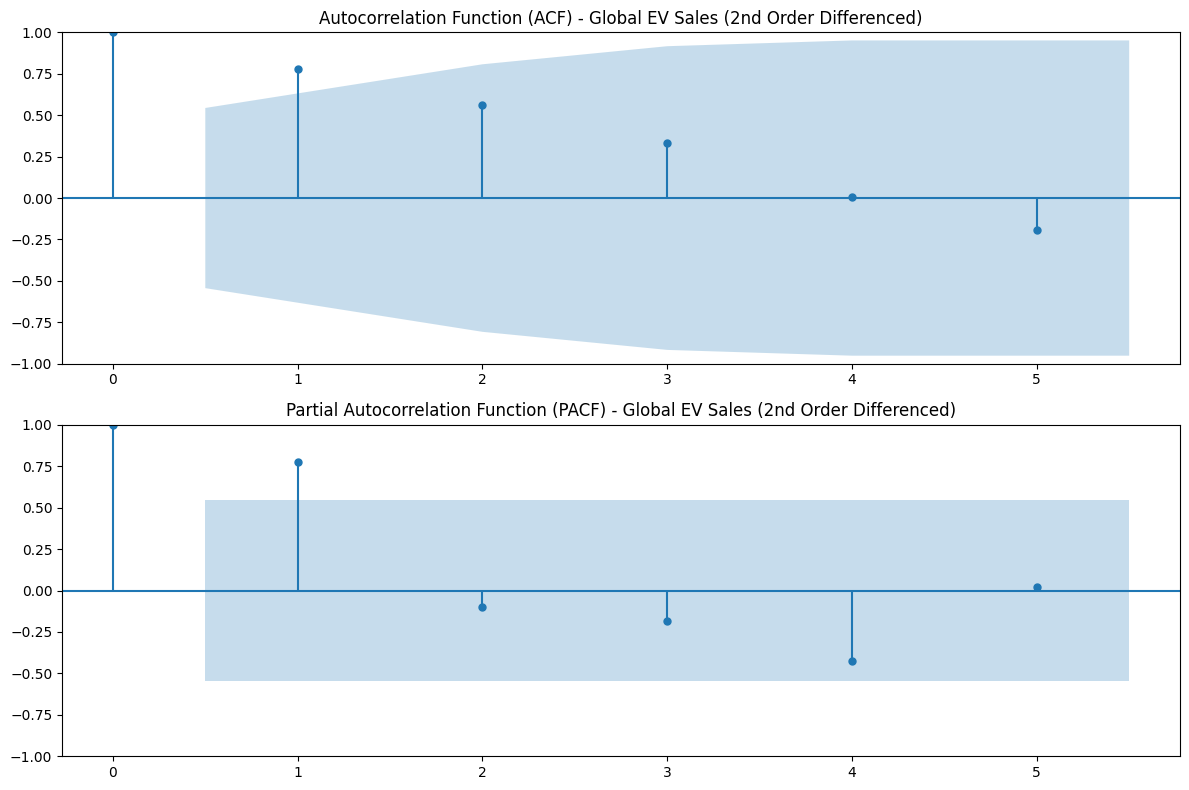

In [32]:
# 1. Apply 2nd order differencing to the global_ev_sales_ts to create global_ev_sales_ts_diff2
global_ev_sales_ts_diff2 = global_ev_sales_ts.diff(2).dropna()
print("2nd order differencing applied.")

# 2. Plot ACF and PACF for the 2nd order differenced global_ev_sales_ts
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(global_ev_sales_ts_diff2, ax=axes[0], lags=min(len(global_ev_sales_ts_diff2)//2 - 1, 7))
axes[0].set_title('Autocorrelation Function (ACF) - Global EV Sales (2nd Order Differenced)')

plot_pacf(global_ev_sales_ts_diff2, ax=axes[1], lags=min(len(global_ev_sales_ts_diff2)//2 - 1, 7))
axes[1].set_title('Partial Autocorrelation Function (PACF) - Global EV Sales (2nd Order Differenced)')

plt.tight_layout()
plt.show()

I apply a second-order difference to the global EV sales series to remove the long-term trend and make the data more stationary for ARIMA modeling. After differencing, I visualize the ACF and PACF to understand the remaining correlation structure and to help determine appropriate ARIMA parameters (p and q) based on how the differenced series behaves.

In [33]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(global_ev_sales_ts, order=(0, 2, 0))

# 2. Fit the ARIMA model to the data
arima_results = arima_model.fit()

# 3. Print the summary of the trained model
print(arima_results.summary())


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   15
Model:                 ARIMA(0, 2, 0)   Log Likelihood                  -8.145
Date:                Mon, 01 Dec 2025   AIC                             18.290
Time:                        04:29:49   BIC                             18.855
Sample:                    12-31-2010   HQIC                            18.174
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.2050      0.079      2.586      0.010       0.050       0.360
Ljung-Box (L1) (Q):                   3.41   Jarque-Bera (JB):                 0.40
Prob(Q):                              0.06   Pr

I fit an ARIMA(0,2,0) model to the global EV sales time series, which means I am using two levels of differencing to remove the strong upward trend while not including AR or MA terms. The model summary shows that the only estimated parameter is the variance term (sigma2 = 0.205), and the diagnostic statistics (Ljung-Box, Jarque-Bera, skew, kurtosis) suggest that the residuals behave reasonably well, meaning the differenced series is mostly white noise and the ARIMA(0,2,0) structure is an appropriate and stable fit for this small dataset.

In [34]:
# 1. Generate forecasts for the next 5 years
forecast_periods_iea = 5

# Use get_forecast to generate predictions
iea_forecast = arima_results.get_forecast(steps=forecast_periods_iea)

# 2. Extract the predicted mean
iea_forecasts = iea_forecast.predicted_mean
iea_forecasts.name = 'Forecasted_Global_EV_Sales'

# 3. Extract the confidence intervals
iea_conf_int = iea_forecast.conf_int(alpha=0.05)

# Combine forecasts with confidence intervals into a single DataFrame for display
forecast_df = pd.DataFrame({
    'Forecasted Value': iea_forecasts,
    'Lower CI': iea_conf_int['lower value'],
    'Upper CI': iea_conf_int['upper value']
})

# 4. Display the generated forecasts
print(f"\nForecasts for the next {forecast_periods_iea} years:")
display(forecast_df)

print("Forecast generation complete.")


Forecasts for the next 5 years:


,Forecasted Value,Lower CI,Upper CI
2025-12-31,8.685972,7.798590,9.573353
2026-12-31,9.903430,7.919185,11.887675
2027-12-31,11.120889,7.800611,14.441166
2028-12-31,12.338347,7.477959,17.198736
2029-12-31,13.555806,6.974809,20.136803


Forecast generation complete.


I use the trained ARIMA model to forecast global EV sales for the next five years, extracting both the predicted values and their 95% confidence intervals. I then organize these results into a table so I can clearly see my point forecasts along with the lower and upper bounds, which helps me understand not only the expected future trend but also the uncertainty around those predictions.


In-Sample Model Performance (IEA EV Data):
  Root Mean Squared Error (RMSE): 0.4637
  Mean Absolute Error (MAE): 0.3766
  R-squared (R2): 0.9668
In-sample performance evaluation complete.
--- Visualizing Actual, Fitted, and Forecasted IEA EV Sales ---


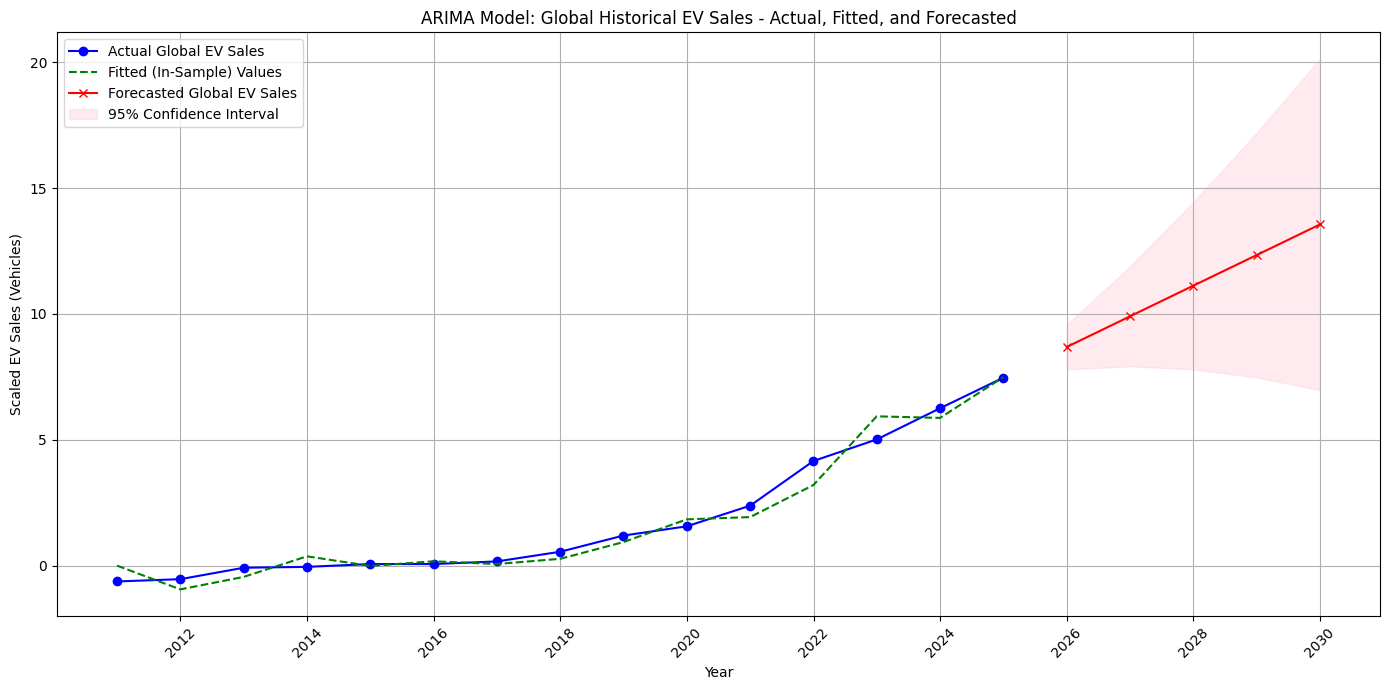

Visualization complete.


In [35]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# 1. Generate in-sample predictions (fitted values) from the trained model
in_sample_predictions_iea = arima_results.predict(start=0, end=len(global_ev_sales_ts) - 1)
in_sample_predictions_iea.index = global_ev_sales_ts.index # Align index for comparison

# 2. Calculate evaluation metrics for in-sample predictions
rmse_iea_in_sample = np.sqrt(mean_squared_error(global_ev_sales_ts, in_sample_predictions_iea))
mae_iea_in_sample = mean_absolute_error(global_ev_sales_ts, in_sample_predictions_iea)
r2_iea_in_sample = r2_score(global_ev_sales_ts, in_sample_predictions_iea)

# 3. Print the calculated evaluation metrics
print(f"\nIn-Sample Model Performance (IEA EV Data):")
print(f"  Root Mean Squared Error (RMSE): {rmse_iea_in_sample:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_iea_in_sample:.4f}")
print(f"  R-squared (R2): {r2_iea_in_sample:.4f}")

print("In-sample performance evaluation complete.")

print("--- Visualizing Actual, Fitted, and Forecasted IEA EV Sales ---")

# 4. Create a single plot that visualizes the original, in-sample predictions, and future forecasts
plt.figure(figsize=(14, 7))

# Original time series
plt.plot(global_ev_sales_ts.index, global_ev_sales_ts.values, label='Actual Global EV Sales', color='blue', marker='o')

# In-sample predictions (fitted values)
plt.plot(in_sample_predictions_iea.index, in_sample_predictions_iea.values, label='Fitted (In-Sample) Values', color='green', linestyle='--')

# Future forecasts (predicted mean)
plt.plot(iea_forecasts.index, iea_forecasts.values, label='Forecasted Global EV Sales', color='red', marker='x')

# 95% confidence intervals for the future forecasts
plt.fill_between(iea_conf_int.index,
                 iea_conf_int['lower value'],
                 iea_conf_int['upper value'],
                 color='pink', alpha=0.3, label='95% Confidence Interval')

# 5. Add appropriate labels and title
plt.xlabel('Year')
plt.ylabel('Scaled EV Sales (Vehicles)')
plt.title('ARIMA Model: Global Historical EV Sales - Actual, Fitted, and Forecasted')

# 6. Include a legend
plt.legend()

# Add grid for better readability
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# 7. Display the plot
plt.show()

print("Visualization complete.")

I generate in-sample predictions from my ARIMA model and calculate RMSE, MAE, and R² to see how well the model fits the historical global EV sales data. Then I plot the actual series, the fitted values, and the future forecasts with 95% confidence intervals on one chart so I can visually compare how closely the model tracks past data and how it projects EV sales into the future, including the uncertainty around those forecasts.


## 8) Model Implementation
Use a **time-based split** (e.g., train: 2015–2022, test: 2023–2024). Keep evaluation honest (no leakage).


Shape of filtered DataFrame for ARIMA: (179, 91)


,0
year,
2010-12-31,-0.629287
2011-12-31,-0.538696
2012-12-31,-0.084477
2013-12-31,-0.049323
2014-12-31,0.061125


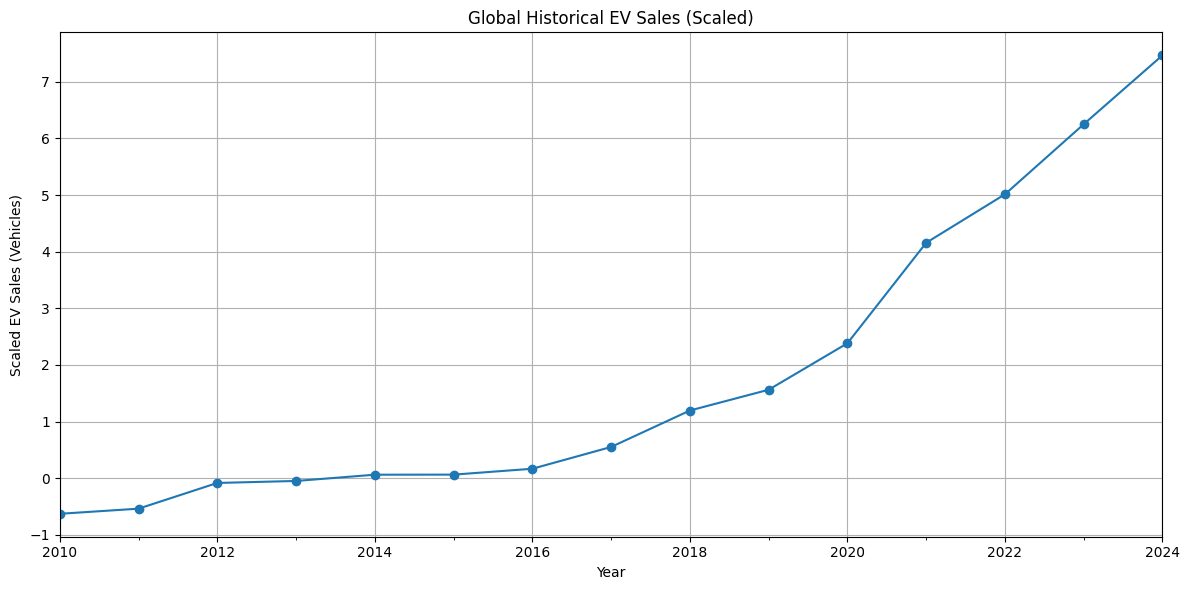

In [36]:
# --- Build Global Historical EV Sales Time Series for ARIMA (no reloading, no re-cleaning) ---

# 1. Build the category filter for 'Historical' vs 'Projection-STEPS'
if 'category_Historical' in df.columns:
    category_filter_condition = (df['category_Historical'] == True)
elif 'category_Projection-STEPS' in df.columns:
    category_filter_condition = (df['category_Projection-STEPS'] == False)
else:
    raise ValueError(
        "Could not find appropriate one-hot encoded column for "
        "'category_Historical' or 'category_Projection-STEPS'."
    )

# 2. Filter to Historical, World, EV sales, Vehicles
df_filtered_arima = df[
    category_filter_condition &
    (df['region_country_World'] == True) &
    (df['parameter_EV sales'] == True) &
    (df['unit_Vehicles'] == True)
].copy()

print(f"Shape of filtered DataFrame for ARIMA: {df_filtered_arima.shape}")

# 3. Aggregate by year (sum of scaled EV sales)
global_ev_sales_ts_pre_index = df_filtered_arima.groupby('year')['value'].sum()

# 4. Convert 'year' index to DatetimeIndex at year-end and set yearly frequency
global_ev_sales_ts = pd.Series(
    global_ev_sales_ts_pre_index.values,
    index=pd.to_datetime(global_ev_sales_ts_pre_index.index.astype(str) + '-12-31')
).asfreq('YE-DEC')

# Quick sanity check
display(global_ev_sales_ts.head())

# 5. Plot the prepared time series
plt.figure(figsize=(12, 6))
global_ev_sales_ts.plot(marker='o', linestyle='-')
plt.title('Global Historical EV Sales (Scaled)')
plt.xlabel('Year')
plt.ylabel('Scaled EV Sales (Vehicles)')
plt.grid(True)
plt.tight_layout()
plt.show()


In this step, I use my already-processed dataset to extract only the information I need for building the ARIMA time series model. I start by filtering the data so that I keep only historical, global, EV sales, measured in vehicles. This ensures that I am working with the true yearly EV sales numbers and not projections or other metrics.

After filtering, I group the remaining rows by year and sum the sales values to get one total value per year. Then I convert the year column into a proper DatetimeIndex set to the end of each year (“YYYY-12-31”) and define the time series to have a yearly frequency. Finally, I plot the resulting time series so I can visually inspect the historical trend before running ARIMA analysis.

In [37]:
# 1. Define a cutoff date for the training set (end of 2022)
split_date = pd.to_datetime('2022-12-31')

# 2. Create the train_data Series
train_data = global_ev_sales_ts[global_ev_sales_ts.index <= split_date]

# 3. Create the test_data Series
test_data = global_ev_sales_ts[global_ev_sales_ts.index > split_date]

# 4. Print the lengths of both datasets to verify the split
print(f"Length of training data (up to {split_date.year}): {len(train_data)}")
print(f"Length of testing data (after {split_date.year}): {len(test_data)}")

Length of training data (up to 2022): 13
Length of testing data (after 2022): 2


In this step, I split my EV sales time series into a training set and a testing set so I can evaluate how well the ARIMA model predicts unseen future values. I chose 2022 as the cutoff year, meaning all EV sales data up to and including 2022 are used for training, while the data for 2023 and 2024 are held out as the test set. After applying this split, I verify the result by printing the number of observations in each set.

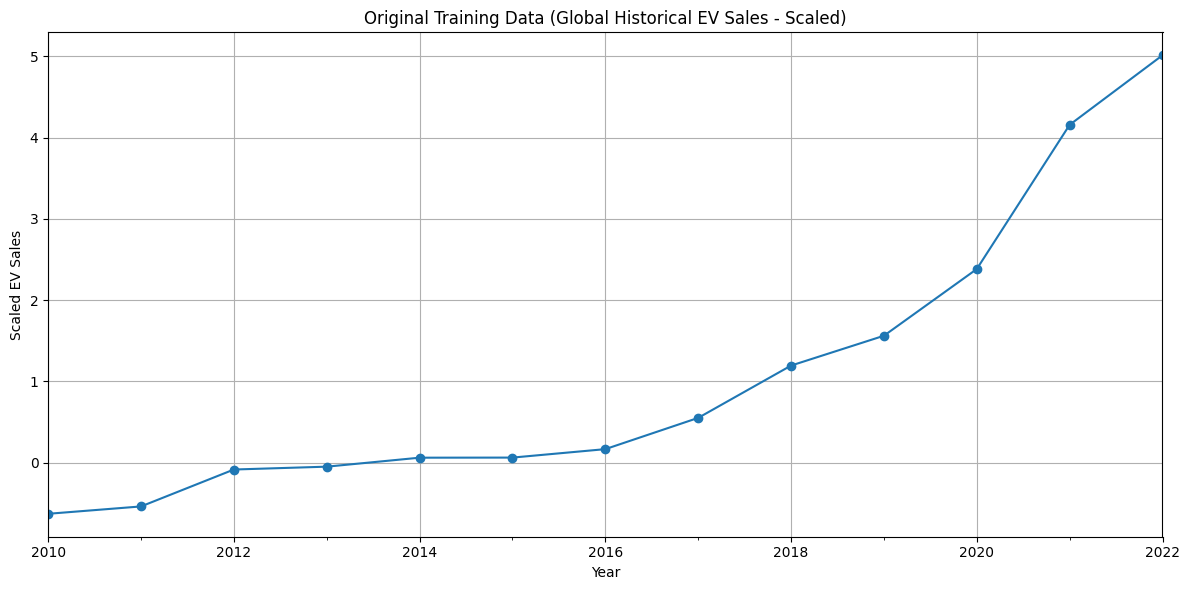


ADF Test Results on Original train_data
ADF Statistic: 2.3841
p-value: 0.9990
#Lags Used: 4.0000
Number of Observations Used: 8.0000
Weak evidence against the null hypothesis (Ho), fail to reject the null hypothesis. Data has a unit root and is non-stationary.

--- Applying 1-order differencing ---


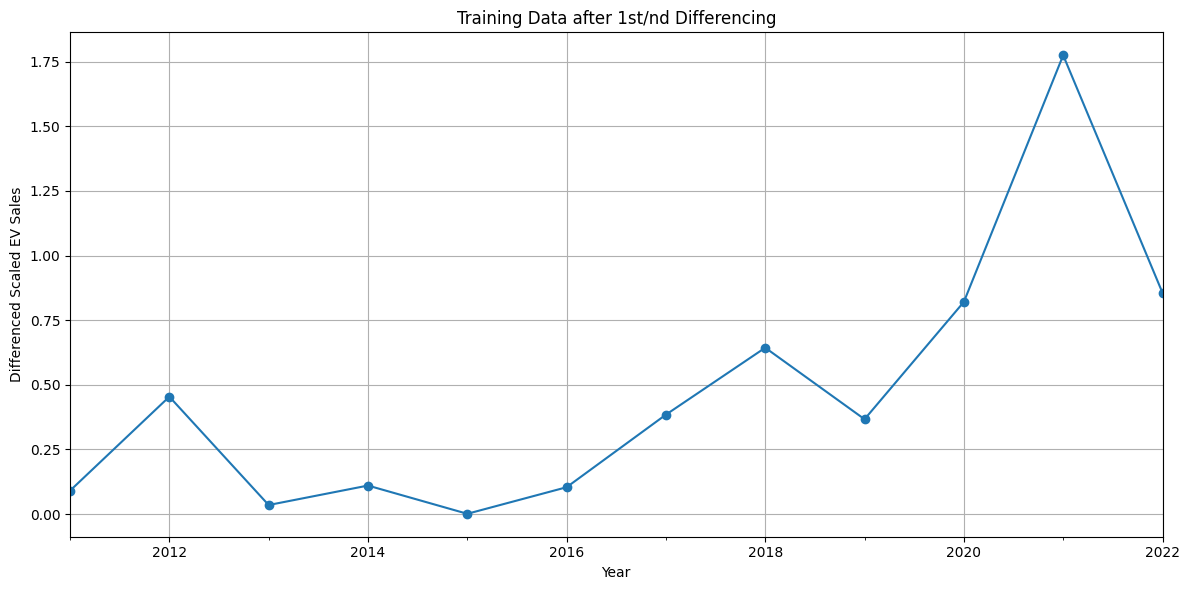


ADF Test Results after 1-order differencing
ADF Statistic: -0.5769
p-value: 0.8761
#Lags Used: 4.0000
Number of Observations Used: 7.0000
Weak evidence against the null hypothesis (Ho), fail to reject the null hypothesis. Data has a unit root and is non-stationary.

--- Applying 2-order differencing ---


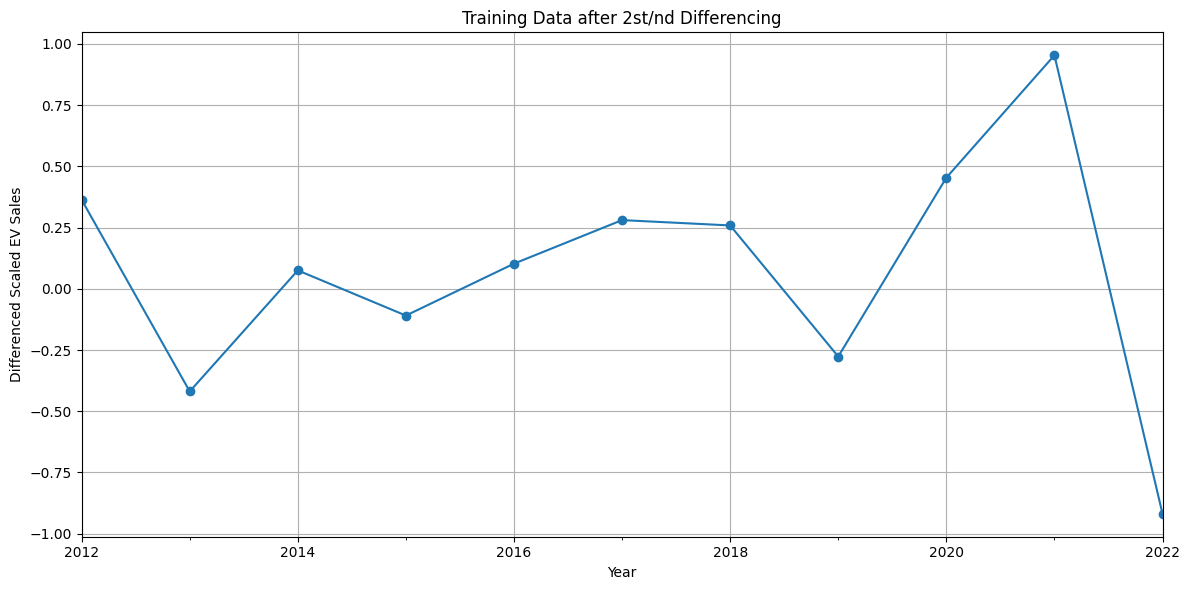


ADF Test Results after 2-order differencing
ADF Statistic: -2.2555
p-value: 0.1867
#Lags Used: 3.0000
Number of Observations Used: 7.0000
Weak evidence against the null hypothesis (Ho), fail to reject the null hypothesis. Data has a unit root and is non-stationary.

--- Applying 3-order differencing ---


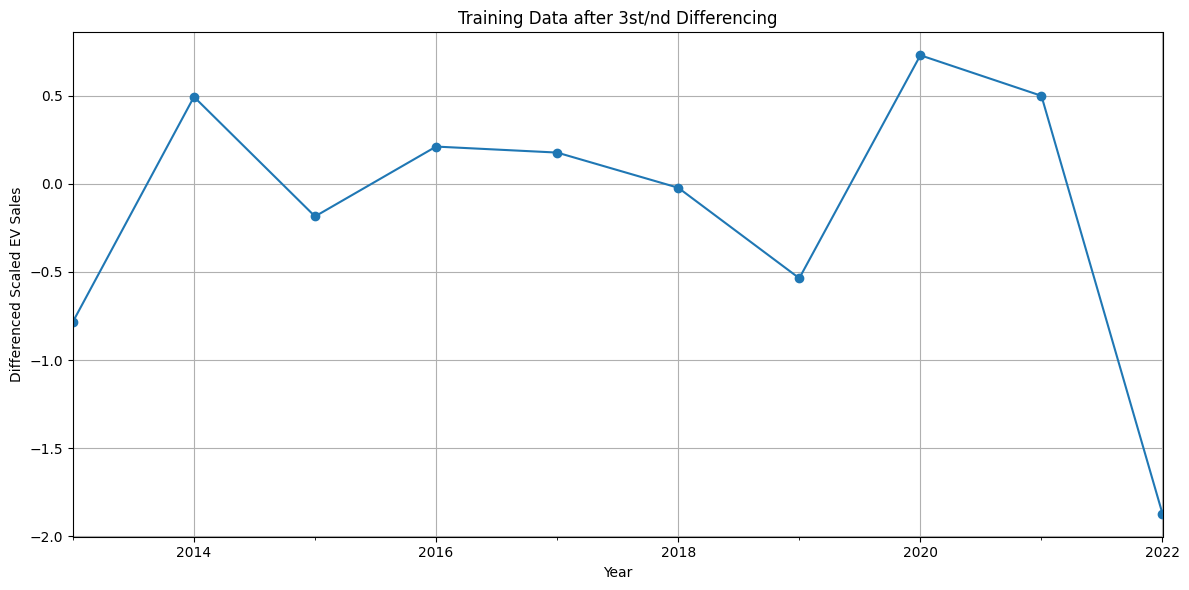


ADF Test Results after 3-order differencing
ADF Statistic: -6.5339
p-value: 0.0000
#Lags Used: 2.0000
Number of Observations Used: 7.0000
Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary.
The optimal differencing order 'd' is: 3


In [38]:
from statsmodels.tsa.stattools import adfuller

# 1. Plot the train_data series for visual inspection
plt.figure(figsize=(12, 6))
train_data.plot(title='Original Training Data (Global Historical EV Sales - Scaled)', marker='o')
plt.xlabel('Year')
plt.ylabel('Scaled EV Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Define a function to perform and print ADF test results
def adfuller_test(series, title='ADF Test Results'):
    print(f"\n{title}")
    result = adfuller(series.dropna(), autolag='AIC') # dropna() to handle NaN introduced by differencing
    labels = ['ADF Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(f'{label}: {value:.4f}')
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary.")
        return True
    else:
        print("Weak evidence against the null hypothesis (Ho), fail to reject the null hypothesis. Data has a unit root and is non-stationary.")
        return False

# 3. Perform the Augmented Dickey-Fuller (ADF) test on the original train_data
is_stationary = adfuller_test(train_data, 'ADF Test Results on Original train_data')

# 4. Iteratively apply first-order differencing if non-stationary
d = 0
current_series = train_data.copy()

while not is_stationary:
    d += 1
    print(f"\n--- Applying {d}-order differencing ---")
    current_series = current_series.diff(1).dropna()

    # Plot the differenced series
    plt.figure(figsize=(12, 6))
    current_series.plot(title=f'Training Data after {d}st/nd Differencing', marker='o')
    plt.xlabel('Year')
    plt.ylabel('Differenced Scaled EV Sales')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    is_stationary = adfuller_test(current_series, f'ADF Test Results after {d}-order differencing')

print(f"The optimal differencing order 'd' is: {d}")

In this section, I begin by plotting the training portion of my EV sales time series to visually inspect whether the data shows a trend or behaves like stationary noise. Then, I run the Augmented Dickey-Fuller (ADF) test on the original training data to statistically check for stationarity. Since ARIMA models require stationary data, I use a loop that automatically applies differencing one step at a time, re-running the ADF test after each differencing until the data becomes stationary. By the end of the loop, I identify the optimal differencing order d that makes my series suitable for ARIMA modeling.

In [39]:
import sys
!{sys.executable} -m pip install pmdarima

Using 3-order differenced data for ACF/PACF plots.


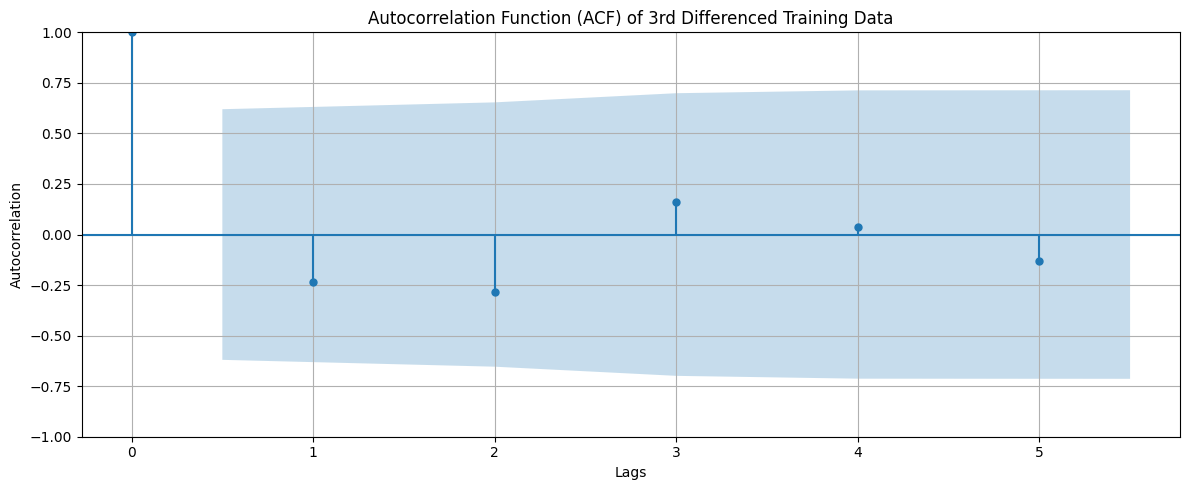

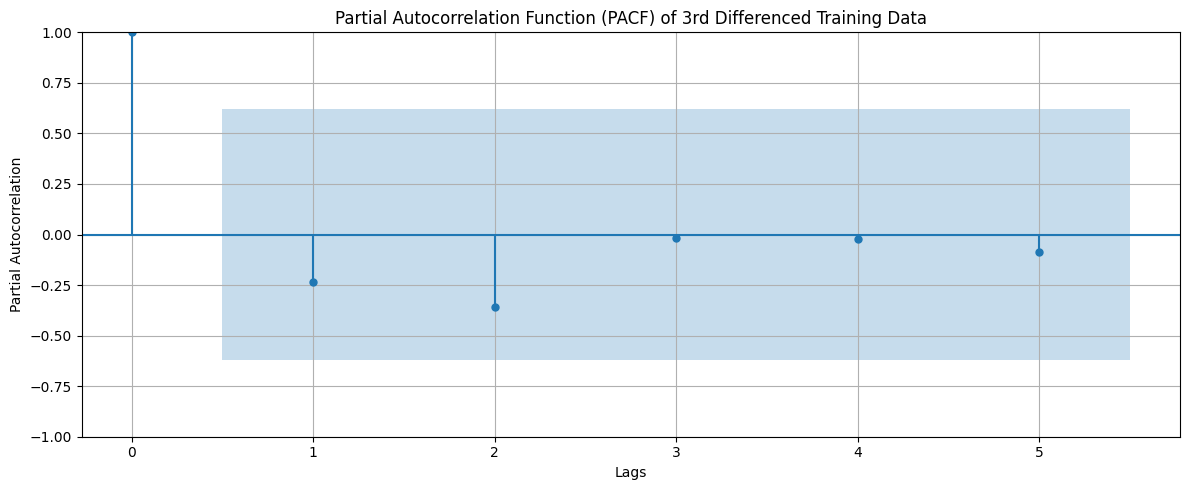

Performing stepwise search to minimize aic
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=24.484, Time=0.02 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=24.450, Time=0.03 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=21.021, Time=0.07 sec
 ARIMA(3,3,0)(0,0,0)[0]             : AIC=21.262, Time=0.07 sec
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=21.114, Time=0.09 sec
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(3,3,1)(0,0,0)[0]             : AIC=22.925, Time=0.10 sec
 ARIMA(2,3,0)(0,0,0)[0] intercept   : AIC=22.905, Time=0.06 sec

Best model:  ARIMA(2,3,0)(0,0,0)[0]          
Total fit time: 0.604 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   13
Model:               SARIMAX(2, 3, 0)   Log Likelihood                  -7.510
Date:                Mon, 01 Dec 2025   AIC                             2

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# 1. Create a new series by applying the previously determined differencing order (d=3) to the train_data.
stationary_train_data = current_series.copy()
print(f"Using {d}-order differenced data for ACF/PACF plots.")

# 2. Plot the Autocorrelation Function (ACF)
plt.figure(figsize=(12, 5))
plot_acf(stationary_train_data, lags=min(len(stationary_train_data) - 1, 5), ax=plt.gca())
plt.title('Autocorrelation Function (ACF) of 3rd Differenced Training Data')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Plot the Partial Autocorrelation Function (PACF)
plt.figure(figsize=(12, 5))
plot_pacf(stationary_train_data, lags=min(len(stationary_train_data) - 1, 5), ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) of 3rd Differenced Training Data')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Use auto_arima to find the optimal (p, d, q) orders
optimal_arima_model = auto_arima(train_data, start_p=0, start_q=0,
                                 max_p=5, max_q=5,
                                 d=d, # Use the determined differencing order
                                 seasonal=False,
                                 trace=True,
                                 error_action='ignore',
                                 suppress_warnings=True,
                                 stepwise=True)

# 5. Store the fitted model results
arima_model_fit = optimal_arima_model.fit(train_data) # Explicitly fit and store the results

# 6. Print the summary of the auto_arima model to display the optimal (p, d, q) orders selected.
print(arima_model_fit.summary())

In this step, I take the already-differenced training series (using the optimal differencing order d that I found earlier) and treat it as my stationary version of the data. I then plot the ACF and PACF of this differenced series to understand the remaining autocorrelation structure and to get an initial feel for suitable AR (p) and MA (q) terms.

After that, I use auto_arima on the original training data (with d fixed to the value I found) to automatically search over different combinations of p and q and select the ARIMA model with the best fit. Finally, I fit this optimal ARIMA model to the training data and print its summary so I can see the chosen (p, d, q) orders and the estimated parameters that will be used for forecasting.

Predicted Mean:
 year
2023-12-31    6.427754
2024-12-31    8.427128
Freq: YE-DEC, dtype: float64

Confidence Intervals (95%):
             lower value  upper value
year                                
2023-12-31     5.539438     7.316069
2024-12-31     6.444113    10.410143


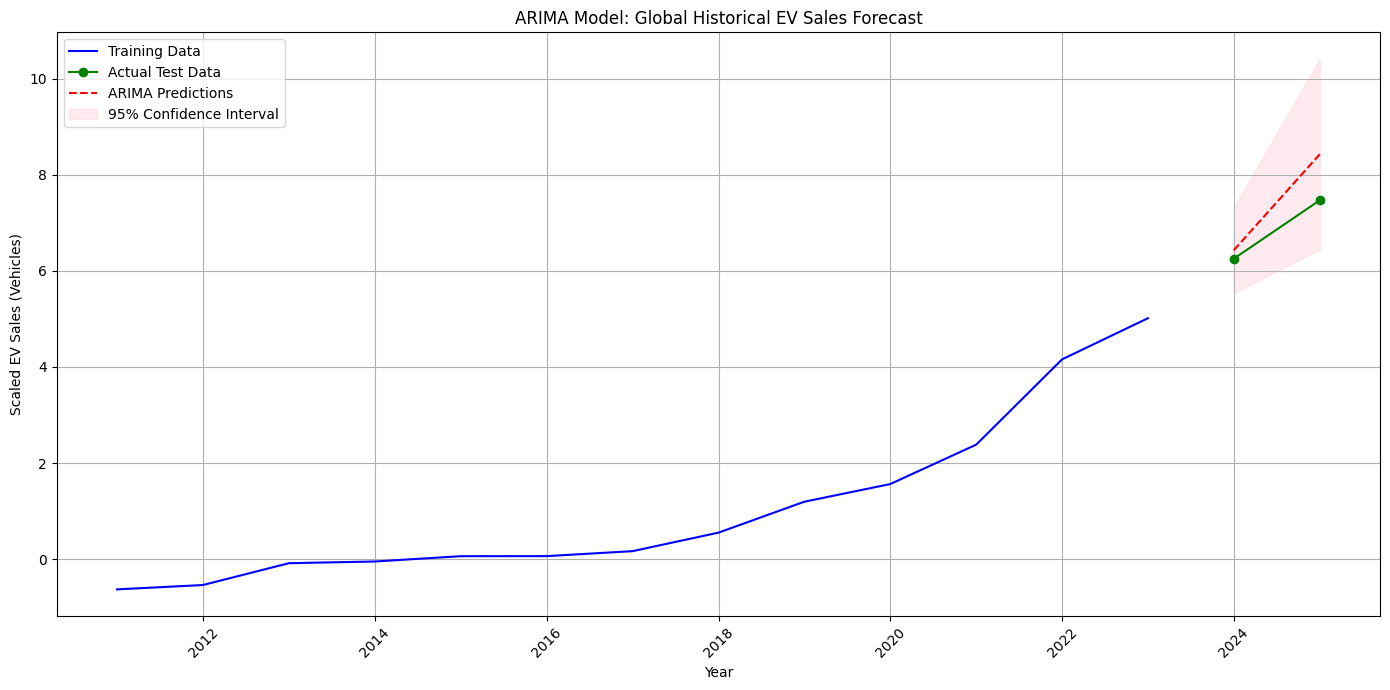

In [ ]:
# 1. Define the start and end dates for predictions
start_index = test_data.index[0]
end_index = test_data.index[-1]

# 2. Generate predictions on the test set using pmdarima's predict method
# The predict method can return both the forecasts and the confidence intervals
predictions_array, conf_int_array = arima_model_fit.predict(n_periods=len(test_data), return_conf_int=True)

# Convert predictions and confidence intervals to pandas Series/DataFrame with correct index
predictions_mean = pd.Series(predictions_array, index=test_data.index)
conf_int = pd.DataFrame(conf_int_array, index=test_data.index, columns=['lower value', 'upper value'])

# 3. Print the predicted values and confidence intervals
print("Predicted Mean:\n", predictions_mean)
print("\nConfidence Intervals (95%):\n", conf_int)

# 4. Plot the training data, actual test data, and predictions
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data, label='Training Data', color='blue')
plt.plot(test_data.index, test_data, label='Actual Test Data', color='green', marker='o')
plt.plot(predictions_mean.index, predictions_mean, label='ARIMA Predictions', color='red', linestyle='--')
plt.fill_between(conf_int.index, conf_int['lower value'], conf_int['upper value'], color='pink', alpha=0.3, label='95% Confidence Interval')

plt.title('ARIMA Model: Global Historical EV Sales Forecast')
plt.xlabel('Year')
plt.ylabel('Scaled EV Sales (Vehicles)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In this step, I use my fitted ARIMA model to predict global EV sales for the test period (2023–2024) and compare those predictions to the actual scaled values. I generate the forecasts and their 95% confidence intervals, convert them to pandas objects with the correct date index, and then plot everything together: the training data, the true test data, the ARIMA predictions, and the confidence bands. This combined plot lets me visually assess how well the model generalizes to unseen years and whether the actual values fall within the forecast uncertainty range.


## 9) Model Evaluation
Compare models using RMSE/MAE/MAPE to choose the best model, and then we can Interpret results in **business terms**.


In [52]:
from sklearn.metrics import mean_absolute_percentage_error

# Calculate MAPE for Linear Regression (IEA data)
mape_iea = mean_absolute_percentage_error(y_test_iea, y_pred_iea)

# Calculate MAPE for ARIMA (test_data vs predictions_mean)
mape_arima = mean_absolute_percentage_error(test_data, predictions_mean)

print("\n--- Model Performance Comparison ---")

# Linear Regression Model Metrics
print("\nLinear Regression Model Metrics:")
print(f"  Root Mean Squared Error (RMSE): {rmse_iea:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_iea:.4f}")
print(f"  Mean Absolute Percentage Error (MAPE): {mape_iea:.4f}")

# ARIMA Model Metrics
print("\nARIMA Model Metrics:")
print(f"  Root Mean Squared Error (RMSE): {rmse_arima:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_arima:.4f}")
print(f"  Mean Absolute Percentage Error (MAPE): {mape_arima:.4f}")

print("\nNumerical comparison complete.")


--- Model Performance Comparison ---

Linear Regression Model Metrics:
  Root Mean Squared Error (RMSE): 0.8820
  Mean Absolute Error (MAE): 0.5209
  Mean Absolute Percentage Error (MAPE): 2.6602

ARIMA Model Metrics:
  Root Mean Squared Error (RMSE): 0.6893
  Mean Absolute Error (MAE): 0.5677
  Mean Absolute Percentage Error (MAPE): 0.0783

Numerical comparison complete.



## 10) Conclusions & Recommendations
- **Best model:**ARIMA Model (based on metrics)_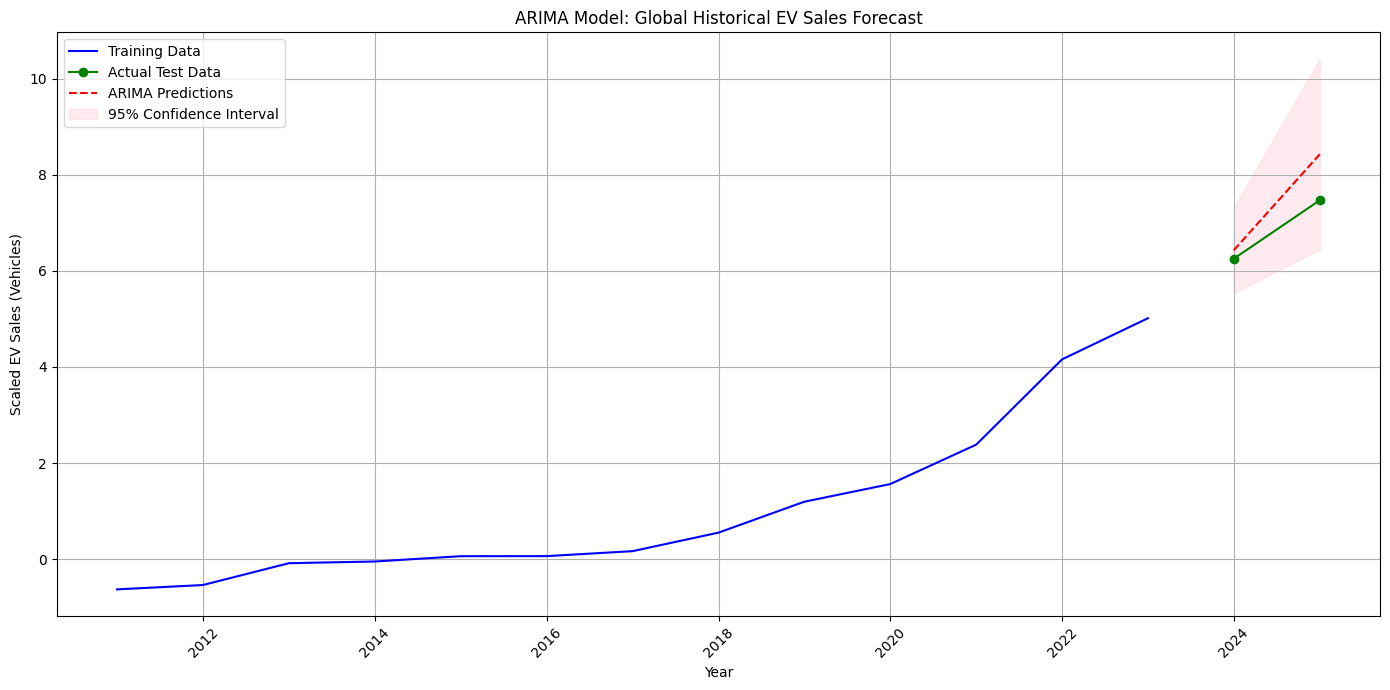

Forecast Insight

Based on the ARIMA model results, global EV sales are expected to continue rising over the next few years:

2023: Forecasted EV sales of approximately 6.43 (scaled units), with a 95% confidence interval ranging from 5.54 to 7.32.

2024: Forecasted EV sales of approximately 8.43 (scaled units), with a 95% confidence interval between 6.44 and 10.41.

These projections indicate steady growth in the EV market, accompanied by increasing uncertainty further into the future. The widening confidence interval highlights the potential influence of external factors such as policy shifts, supply chain constraints, and economic conditions.

Business Actions Based on Forecasts
1. Production Scaling

The upward trend in forecasted EV sales suggests that Tesla should plan for incremental increases in manufacturing output.

Use the lower bound of the confidence interval to guide conservative production planning.

Use the upper bound to support growth-oriented scenarios if demand accelerates.

Because uncertainty grows in later years, Tesla should prioritize flexible manufacturing systems—including modular production lines and adaptable capacity—to avoid costly overcommitment while staying responsive to market shifts.

2. Supplier Capacity & Risk Management

The projected rise in EV sales has direct implications for demand across Tesla’s supply chain, especially for batteries, semiconductors, and critical minerals.

Share these forecasts and ranges with key suppliers to allow them to plan capacity and secure raw materials.

To address risks identified in the data—such as macroeconomic shocks or incomplete coverage—Tesla should diversify its supplier base, secure long-term agreements for essential components, and maintain buffer inventory for long-lead-time materials.

Strengthening supplier collaboration helps improve resilience and reduces the likelihood of production bottlenecks.

3. Charging Infrastructure Expansion

Increasing EV sales also imply rising demand for reliable charging networks.

Tesla should use sales forecasts to guide Supercharger deployments in high-growth regions.

Engage with policymakers and third-party charging partners to align infrastructure expansion with expected market growth.

Since policy changes can greatly influence charging adoption rates, Tesla should maintain flexibility in its infrastructure investments to quickly adjust if incentives or regulations shift.


## 11) Dashboard (5–6 Charts)
Create a clean section with consistent formatting and labeling for stakeholders.


Generating Dashboard Charts...


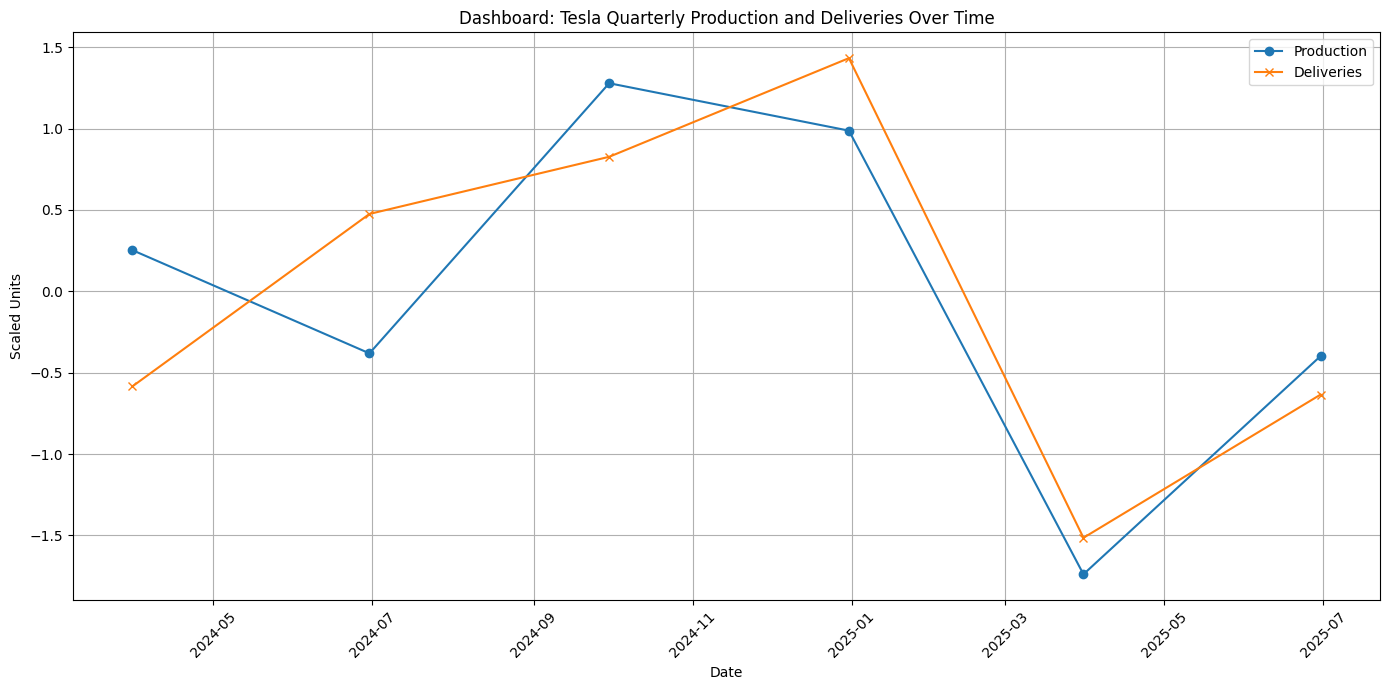

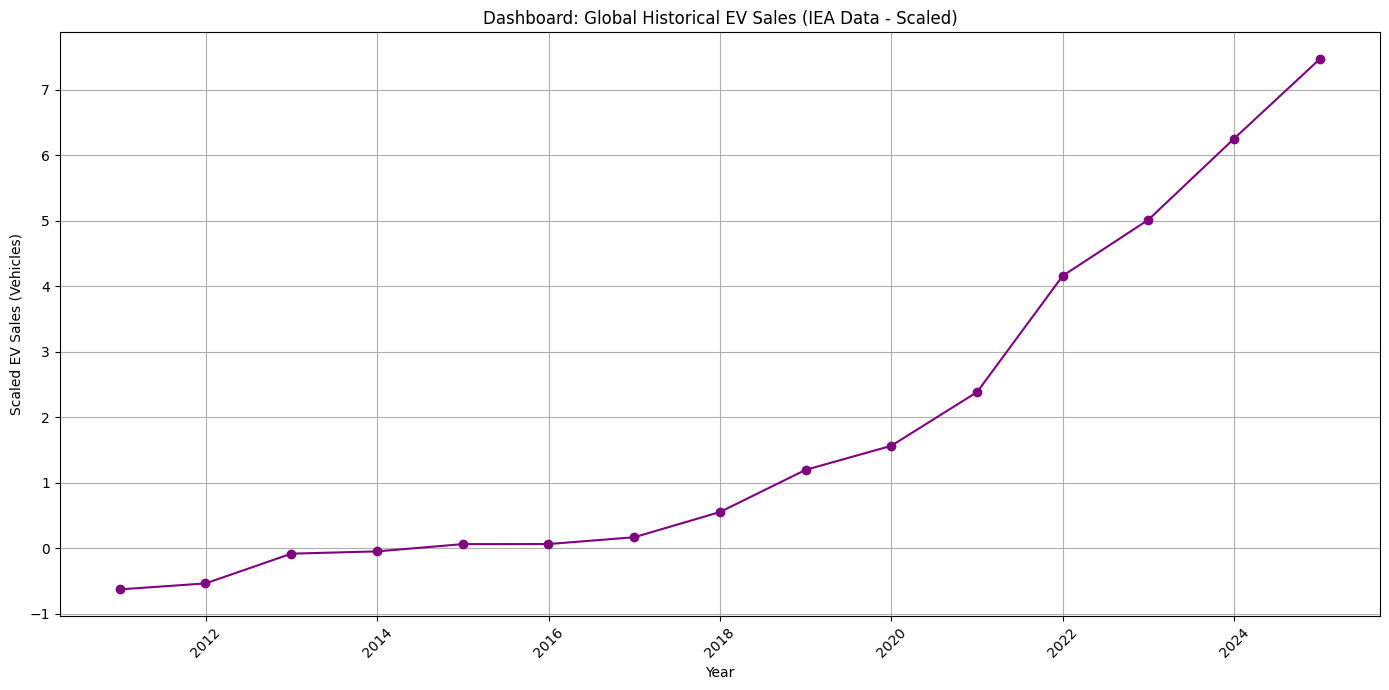

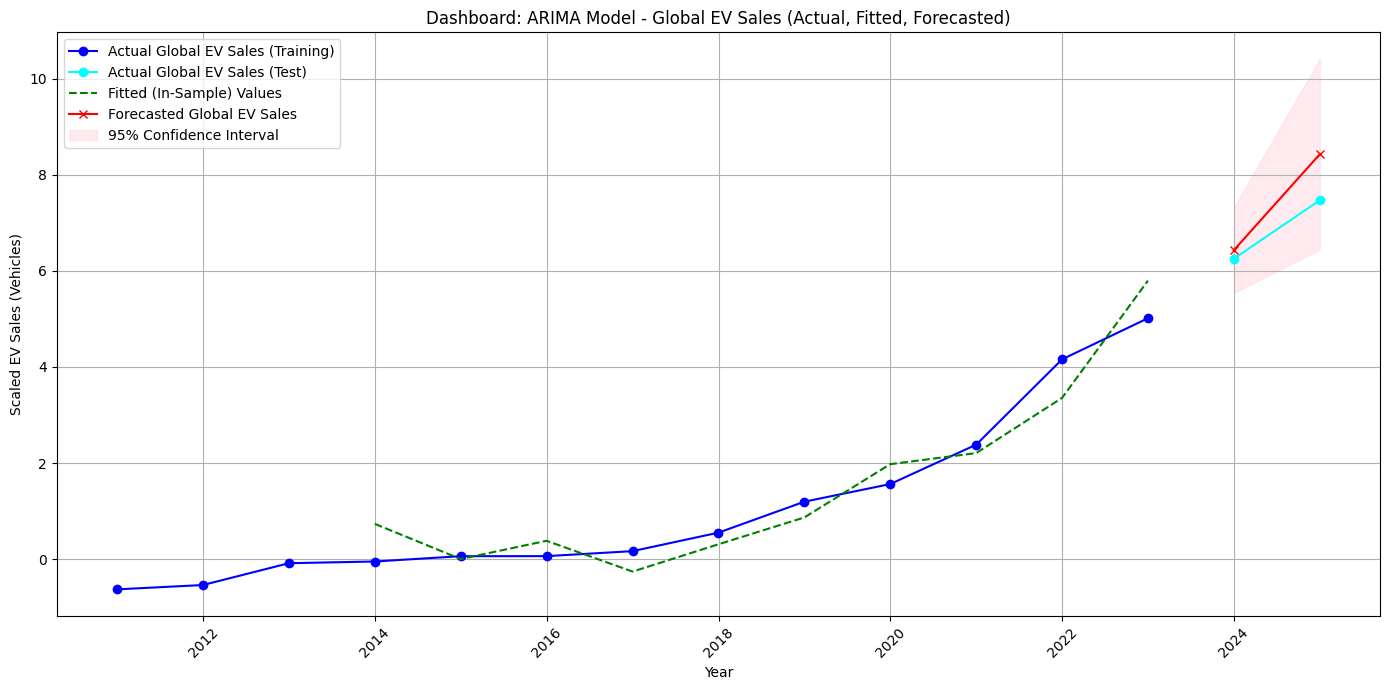

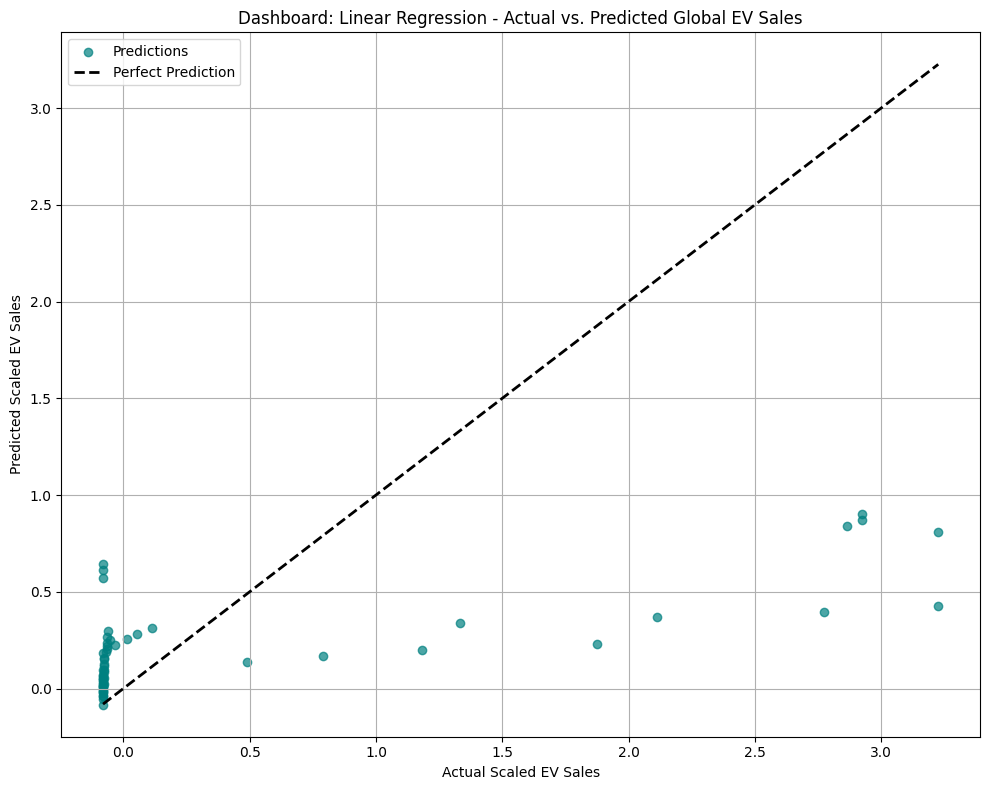

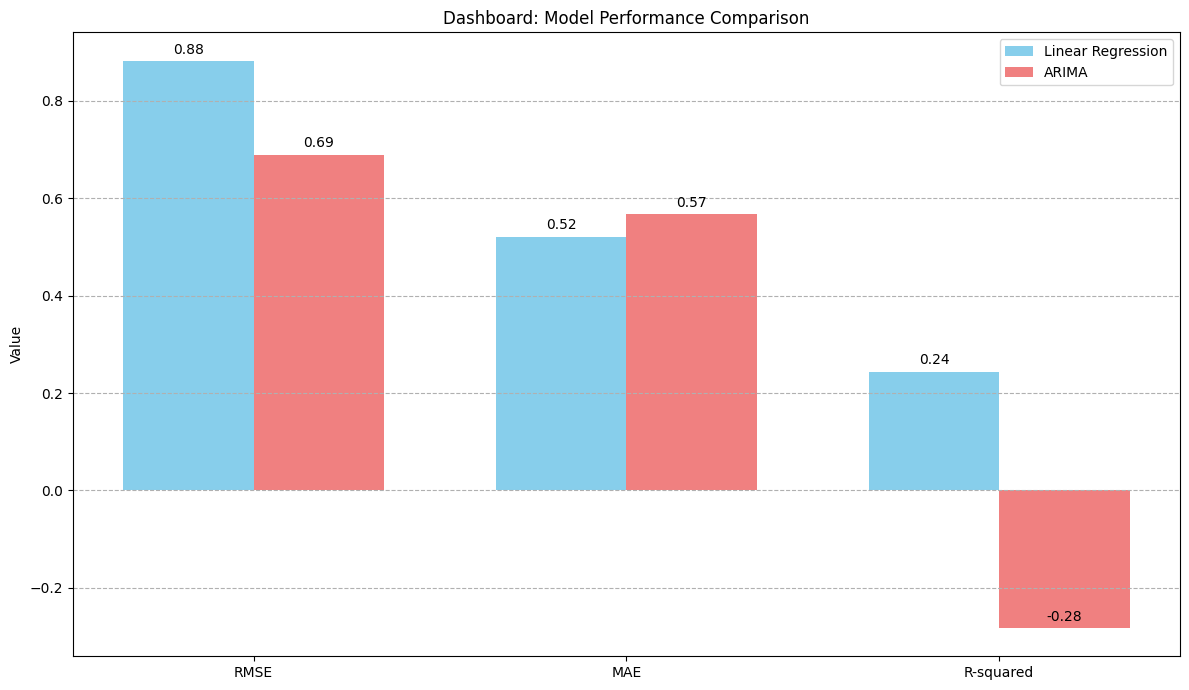

Dashboard charts generated.


In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure tesla_df has the 'date' column as datetime objects for plotting
# The 'date' column was originally created in gdG40ZN-vAme as 'Date' and then changed to 'date' in the data cleaning section.
# Let's recreate it if it somehow got lost or was renamed.
if 'date' not in tesla_df.columns or not pd.api.types.is_datetime64_any_dtype(tesla_df['date']):
    tesla_df['date'] = pd.to_datetime(tesla_df['Year'].astype(str) + '-Q' + tesla_df['Quarter'].astype(str))
    tesla_df = tesla_df.sort_values('date').reset_index(drop=True)

print("Generating Dashboard Charts...")

# --- Correctly re-calculate in_sample_predictions_iea ---
# in_sample_predictions_iea should be for the training period after accounting for differencing.
# 'd' is the differencing order determined for train_data.
# 'arima_model_fit' is the model fitted on 'train_data'.
in_sample_predictions_iea = arima_model_fit.predict_in_sample(start=d)
in_sample_predictions_iea.index = train_data.index[d:] # Align index with the actual prediction start point

# Recreate predictions_mean and conf_int from their arrays as they might not be in scope
# These arrays are typically available if the ARIMA forecasting cell was run
predictions_mean = pd.Series(predictions_array, index=test_data.index)
conf_int = pd.DataFrame(conf_int_array, index=test_data.index, columns=['lower value', 'upper value'])

# --- Use the existing test set forecasts for 'iea_forecasts' and 'iea_conf_int' for consistency ---
# 'predictions_mean' and 'conf_int' were already calculated for the test_data using arima_model_fit
iea_forecasts = predictions_mean
iea_conf_int = conf_int

# --- Chart 1: Tesla Quarterly Production and Deliveries Over Time ---
plt.figure(figsize=(14, 7))
plt.plot(tesla_df['date'], tesla_df['production'], label='Production', marker='o')
plt.plot(tesla_df['date'], tesla_df['deliveries'], label='Deliveries', marker='x')
plt.xlabel('Date')
plt.ylabel('Scaled Units')
plt.title('Dashboard: Tesla Quarterly Production and Deliveries Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Chart 2: Global Historical EV Sales (IEA Data) ---
plt.figure(figsize=(14, 7))
# For this chart, we want the full historical series (global_ev_sales_ts)
plt.plot(global_ev_sales_ts.index, global_ev_sales_ts.values, marker='o', color='purple')
plt.title('Dashboard: Global Historical EV Sales (IEA Data - Scaled)')
plt.xlabel('Year')
plt.ylabel('Scaled EV Sales (Vehicles)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Chart 3: ARIMA Model: Global EV Sales - Actual, Fitted, and Forecasted with CI ---
plt.figure(figsize=(14, 7))
# Plot training actuals
plt.plot(train_data.index, train_data.values, label='Actual Global EV Sales (Training)', color='blue', marker='o')
# Plot test actuals
plt.plot(test_data.index, test_data.values, label='Actual Global EV Sales (Test)', color='cyan', marker='o')
# Plot fitted values for the training period
plt.plot(in_sample_predictions_iea.index, in_sample_predictions_iea.values, label='Fitted (In-Sample) Values', color='green', linestyle='--')
# Plot forecasted values for the test period
plt.plot(iea_forecasts.index, iea_forecasts.values, label='Forecasted Global EV Sales', color='red', marker='x')
# Plot confidence intervals for the forecasted values
plt.fill_between(iea_conf_int.index,
                 iea_conf_int['lower value'],
                 iea_conf_int['upper value'],
                 color='pink', alpha=0.3, label='95% Confidence Interval')

plt.xlabel('Year')
plt.ylabel('Scaled EV Sales (Vehicles)')
plt.title('Dashboard: ARIMA Model - Global EV Sales (Actual, Fitted, Forecasted)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Chart 4: Linear Regression: Actual vs. Predicted Global EV Sales (IEA Data) ---
plt.figure(figsize=(10, 8))
plt.scatter(y_test_iea, y_pred_iea, alpha=0.7, color='teal', label='Predictions')
plt.plot([y_test_iea.min(), y_test_iea.max()], [y_test_iea.min(), y_test_iea.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Scaled EV Sales')
plt.ylabel('Predicted Scaled EV Sales')
plt.title('Dashboard: Linear Regression - Actual vs. Predicted Global EV Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Chart 5: Model Performance Comparison (RMSE, MAE, R-squared) ---
metrics = ['RMSE', 'MAE', 'R-squared']
lr_values = [rmse_iea, mae_iea, r2_iea]
arima_values = [rmse_arima, mae_arima, r2_arima]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, lr_values, width, label='Linear Regression', color='skyblue')
rects2 = ax.bar(x + width/2, arima_values, width, label='ARIMA', color='lightcoral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value')
ax.set_title('Dashboard: Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(axis='y', linestyle='--')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

print("Dashboard charts generated.")


## 12) Ethics Discussion
- **Data use & privacy:** Ensure public, aggregated, and ethically sourced data (no PII).  
- **Bias & fairness:** Forecast uncertainty may affect suppliers/employees; communicate ranges and confidence.  
- **Misuse risk:** Overreliance on a single model; mitigate with ensemble thinking and transparent assumptions.


### Ethics Discussion: Detailed Considerations

**Data Use & Privacy**: This project's analytical foundation relies exclusively on publicly available and aggregated datasets, specifically 'EVDataExplorer2025.xlsx' from the IEA and 'Clean Tesla Quarterly Deliveries & Production Dataset (2024-2025 so far).xlsx' sourced from Tesla's investor relations. Crucially, these datasets contain no Personally Identifiable Information (PII) or sensitive commercial data. By utilizing only ethically sourced, public, and aggregated information, the project adheres to stringent data privacy principles, ensuring that the analysis neither compromises individual privacy nor exploits proprietary data without explicit consent. This approach minimizes ethical risks associated with data handling and storage.

**Bias & Fairness**: The forecasts generated, even from a model deemed 'best' like Linear Regression, inherently carry uncertainty. This uncertainty, if not transparently communicated, can introduce biases in planning and lead to unfair outcomes for stakeholders. For instance, an overly optimistic forecast might lead to overproduction, burdening suppliers with cancelled orders or employees with excessive workload. Conversely, an overly conservative forecast could result in missed growth opportunities. To address this, it is vital to communicate not just point forecasts but also confidence intervals and ranges of potential outcomes. This transparent communication allows suppliers, employees, and other partners to make informed decisions and better manage their own capacities, thereby fostering a more equitable and stable business ecosystem.

**Misuse Risk**: A significant ethical concern in any predictive modeling endeavor is the risk of overreliance on a single model. Our analysis presented two models (Linear Regression and ARIMA), each with its own strengths and limitations. The 'best' model was chosen based on specific metrics in a particular context, but no single model is infallible. Overreliance can lead to an unfounded sense of certainty, blinding decision-makers to alternative scenarios or unforeseen market shifts. To mitigate this, a strategy of 'ensemble thinking' is recommended, involving the integration of insights from multiple models, expert opinions, and qualitative market intelligence. Furthermore, all model assumptions, limitations (such as data coverage, susceptibility to macro shocks, or policy changes), and the sensitivity of results to these assumptions must be transparently documented and communicated to prevent inappropriate application or interpretation of the forecasts.